In [2]:
import kagglehub
shivamb_machine_predictive_maintenance_classification_path = kagglehub.dataset_download('shivamb/machine-predictive-maintenance-classification')
print('Data source import complete.')

Data source import complete.


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/machine-predictive-maintenance-classification/predictive_maintenance.csv


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
import statistics

In [5]:
# Suppress warnings to ensure clean output
warnings.filterwarnings("ignore")

# Set default visualization theme for Seaborn
sns.set_theme(palette='tab10',
              font='Lucida Calligraphy',
              font_scale=1.5,
              rc=None)

In [6]:
# Update Matplotlib default font size
matplotlib.rcParams.update({'font.size': 15})
plt.style.use('dark_background')

# Display all columns and rows in pandas DataFrame
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)



In [7]:
# Define the file path to the dataset
file_path = "/kaggle/input/machine-predictive-maintenance-classification/predictive_maintenance.csv"

In [8]:
df = pd.read_csv(file_path)
df.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure

In [9]:
# Drop unnecessary columns
df = df.drop(["UDI", "Product ID"], axis=1)

In [10]:
# Convert temperature from Kelvin to Celsius
df["Air temperature [°C]"] = df["Air temperature [K]"] - 272.15
df["Process temperature [°C]"] = df["Process temperature [K]"] - 272.15

# Create a new column for the temperature difference
df["Temperature difference [°C]"] = df["Process temperature [°C]"] - df["Air temperature [°C]"]

# Drop original temperature columns in Kelvin
df = df.drop(columns=["Air temperature [K]", "Process temperature [K]"])

In [11]:
print("Shape of the DataFrame:", df.shape)
print("Size of the DataFrame:", df.size)

Shape of the DataFrame: (10000, 9)
Size of the DataFrame: 90000


In [12]:
print("DataFrame Info:\n")
df.info()

DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Type                         10000 non-null  object 
 1   Rotational speed [rpm]       10000 non-null  int64  
 2   Torque [Nm]                  10000 non-null  float64
 3   Tool wear [min]              10000 non-null  int64  
 4   Target                       10000 non-null  int64  
 5   Failure Type                 10000 non-null  object 
 6   Air temperature [°C]         10000 non-null  float64
 7   Process temperature [°C]     10000 non-null  float64
 8   Temperature difference [°C]  10000 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 703.3+ KB


In [13]:
# Summary statistics for numerical columns
print("\nSummary Statistics:\n")
df.describe()


Summary Statistics:



Rotational speed [rpm]   Torque [Nm]  Tool wear [min]        Target  \
count            10000.000000  10000.000000     10000.000000  10000.000000   
mean              1538.776100     39.986910       107.951000      0.033900   
std                179.284096      9.968934        63.654147      0.180981   
min               1168.000000      3.800000         0.000000      0.000000   
25%               1423.000000     33.200000        53.000000      0.000000   
50%               1503.000000     40.100000       108.000000      0.000000   
75%               1612.000000     46.800000       162.000000      0.000000   
max               2886.000000     76.600000       253.000000      1.000000   

       Air temperature [°C]  Process temperature [°C]  \
count          10000.000000              10000.000000   
mean              27.854930                 37.855560   
std                2.000259                  1.483734   
min               23.150000                 33.550000   
25%               26.150000                 36.650000   
50%               27.950000                 37.950000   
75%               29.350000                 38.950000   
max               32.350000                 41.650000   

       Temperature difference [°C]  
count                 10000.000000  
mean                     10.000630  
std                       1.001094  
min                       7.600000  
25%                       9.300000  
50%                       9.800000  
75%                      11.000000  
max                      12.100000

In [14]:
df.isna().sum()

Type                           0
Rotational speed [rpm]         0
Torque [Nm]                    0
Tool wear [min]                0
Target                         0
Failure Type                   0
Air temperature [°C]           0
Process temperature [°C]       0
Temperature difference [°C]    0
dtype: int64

other way to see missing data

In [15]:
def visualize_missing_data(df: pd.DataFrame) -> None:
    """
    Visualize missing data (if any) in the DataFrame using a heatmap.
    """
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='Blues', yticklabels=False)
    plt.title("Missing Data Heatmap", fontsize=16)
    plt.show()


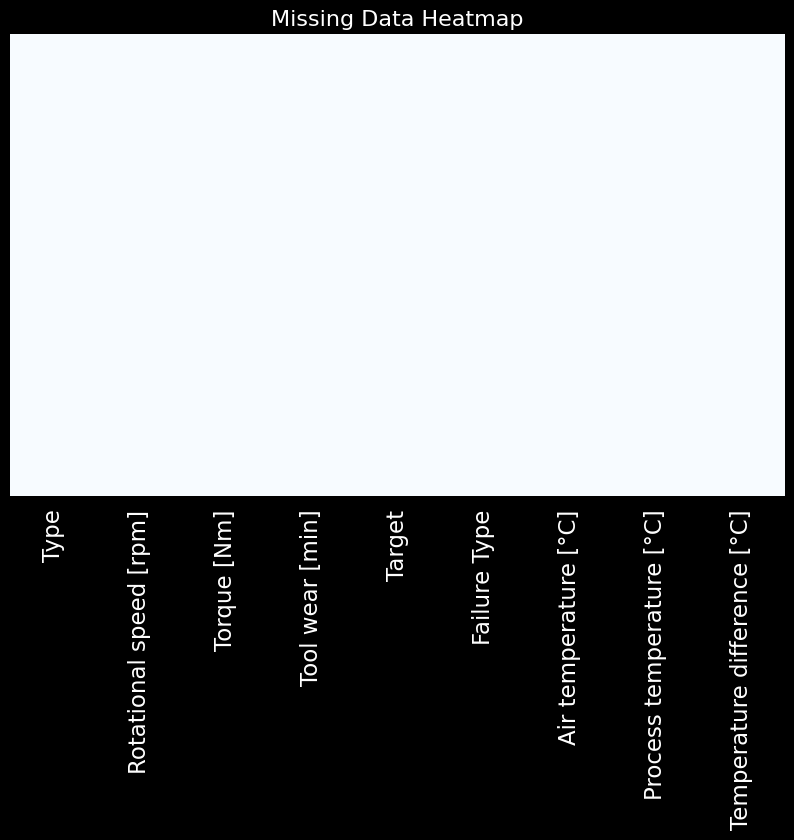

In [16]:
visualize_missing_data(df)

## EDA

### KDE Plots

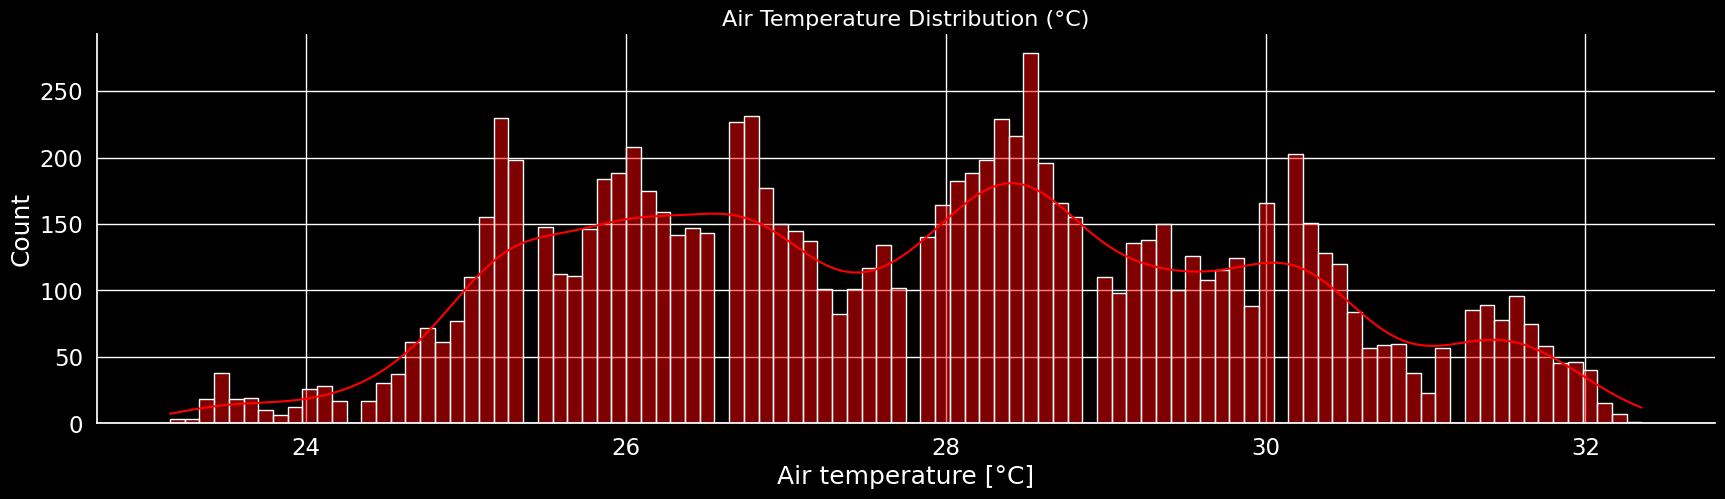

In [17]:
# Air temperature distribution plot with KDE
sns.displot(df, x="Air temperature [°C]", kde=True, bins=100, color="red", aspect=3.5, height=5)
plt.title("Air Temperature Distribution (°C)", fontsize=16)
plt.show()


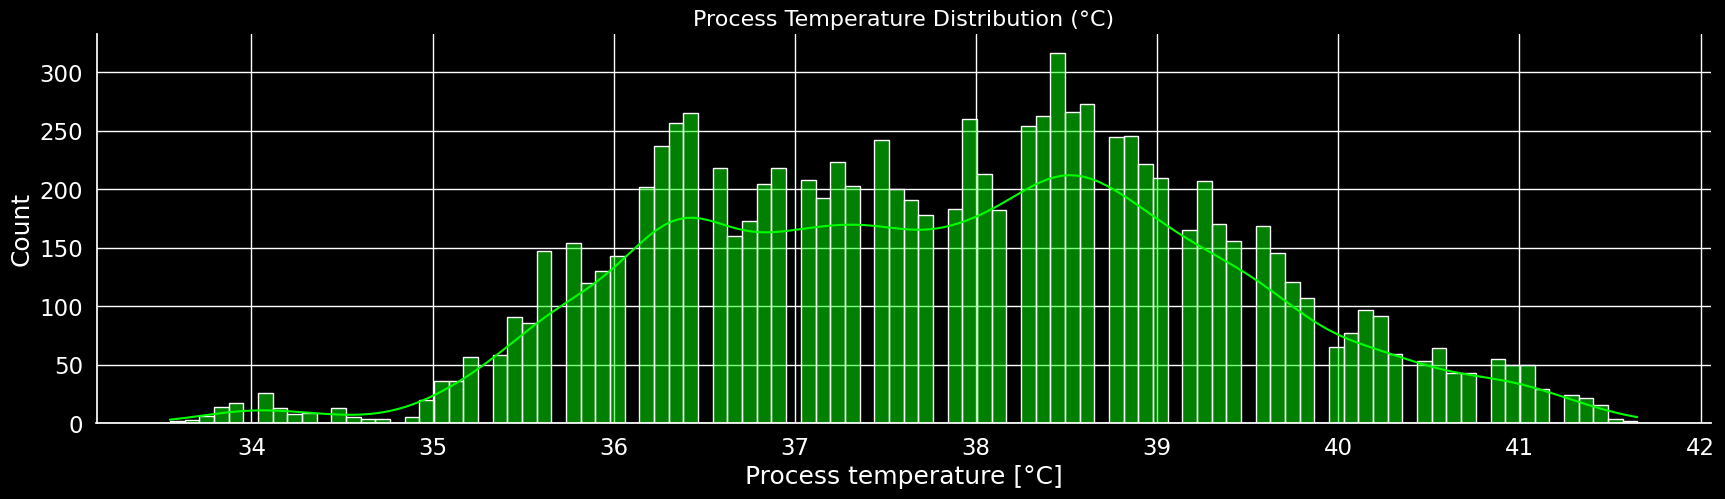

In [18]:
# Process temperature distribution plot with KDE
sns.displot(df, x="Process temperature [°C]", kde=True, bins=100, color="lime", aspect=3.5, height=5)
plt.title("Process Temperature Distribution (°C)", fontsize=16)
plt.show()

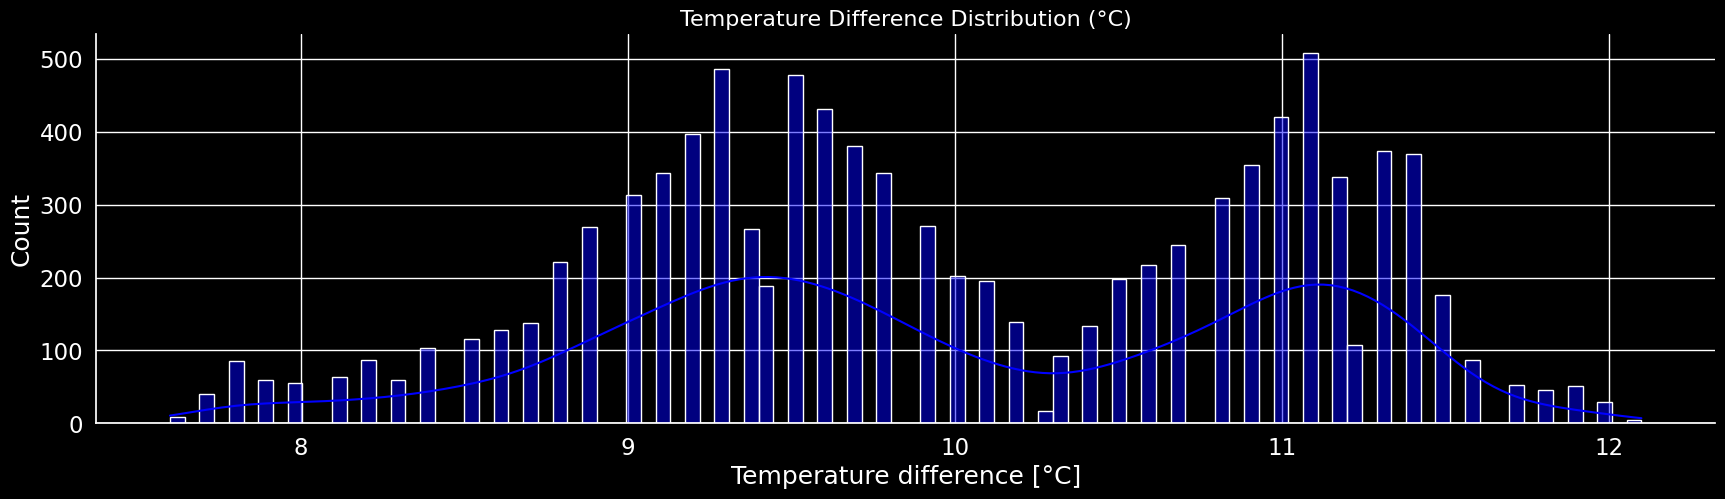

In [19]:
# Temperature difference distribution plot with KDE
sns.displot(df, x="Temperature difference [°C]", kde=True, bins=100, color="blue", aspect=3.5, height=5)
plt.title("Temperature Difference Distribution (°C)", fontsize=16)
plt.show()


### Values counts(columns wise)

In [20]:
# Print value counts for categorical columns
for col in ['Type', 'Target', 'Failure Type']:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("****" * 8)


Value counts for Type:
Type
L    6000
M    2997
H    1003
Name: count, dtype: int64
********************************
Value counts for Target:
Target
0    9661
1     339
Name: count, dtype: int64
********************************
Value counts for Failure Type:
Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64
********************************


### Countplot + pie

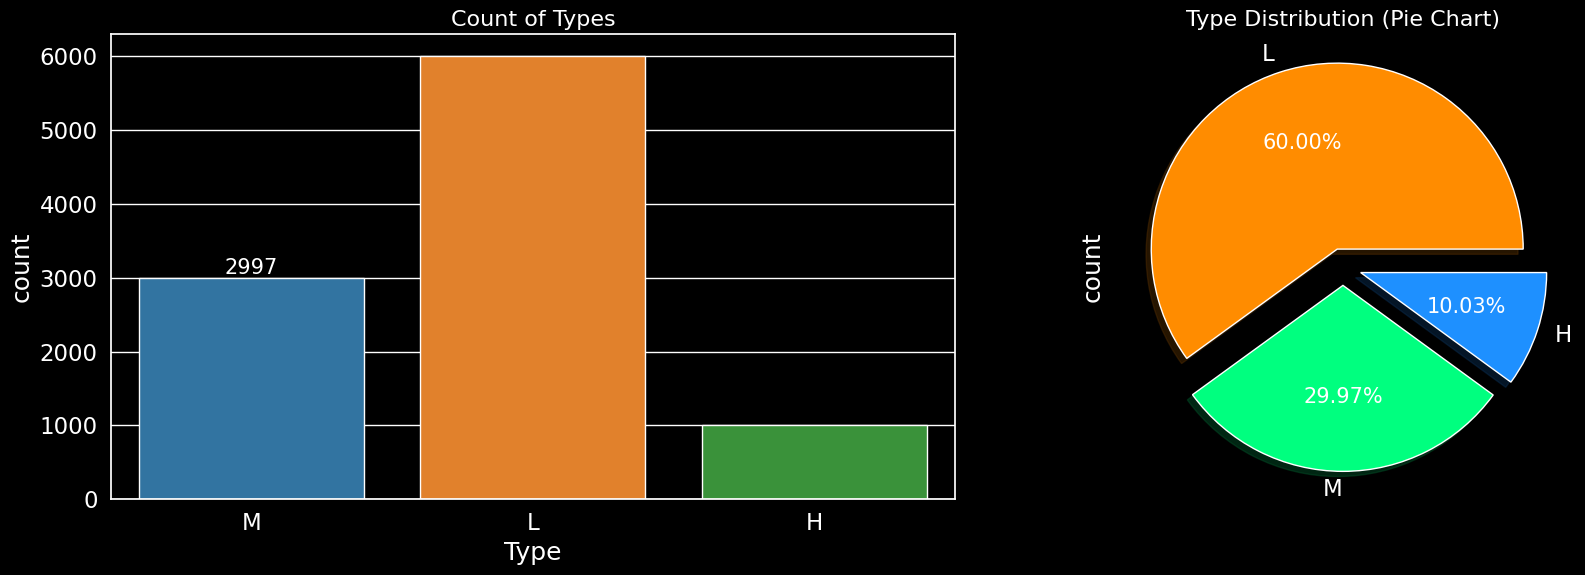

In [21]:
# Countplot and Pie chart for 'Type'
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.countplot(x='Type', data=df, ax=axes[0], palette="tab10")
axes[0].set_title("Count of Types", fontsize=16)
axes[0].bar_label(axes[0].containers[0])

df['Type'].value_counts().plot.pie(explode=[0.1, 0.1, 0.1], autopct='%1.2f%%', shadow=True, ax=axes[1], colors=["#FF8C00", "#00FF7F", "#1E90FF"])
axes[1].set_title("Type Distribution (Pie Chart)", fontsize=16)

plt.tight_layout()
plt.show()

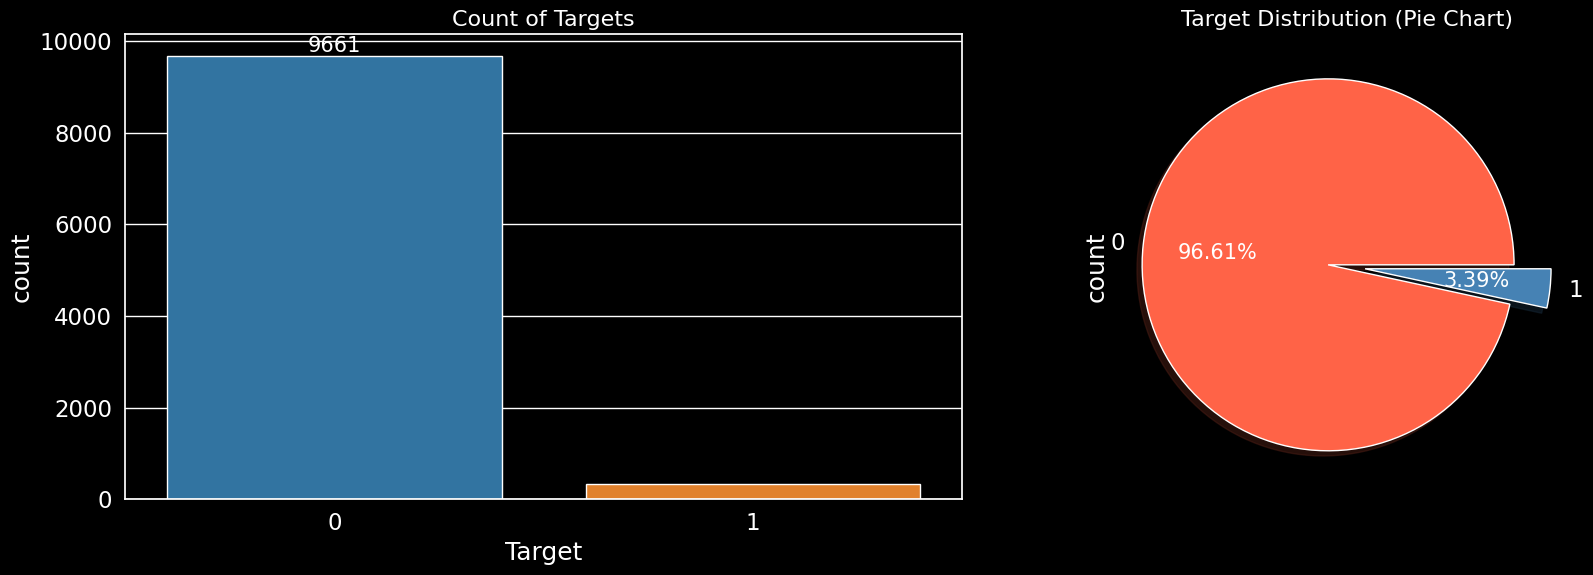

In [22]:
# Countplot and Pie chart for 'Target'
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.countplot(x='Target', data=df, ax=axes[0], palette="tab10")
axes[0].set_title("Count of Targets", fontsize=16)
axes[0].bar_label(axes[0].containers[0])

df['Target'].value_counts().plot.pie(explode=[0.1, 0.1], autopct='%1.2f%%', shadow=True, ax=axes[1], colors=["#FF6347", "#4682B4"])
axes[1].set_title("Target Distribution (Pie Chart)", fontsize=16)

plt.tight_layout()
plt.show()


### pairplot

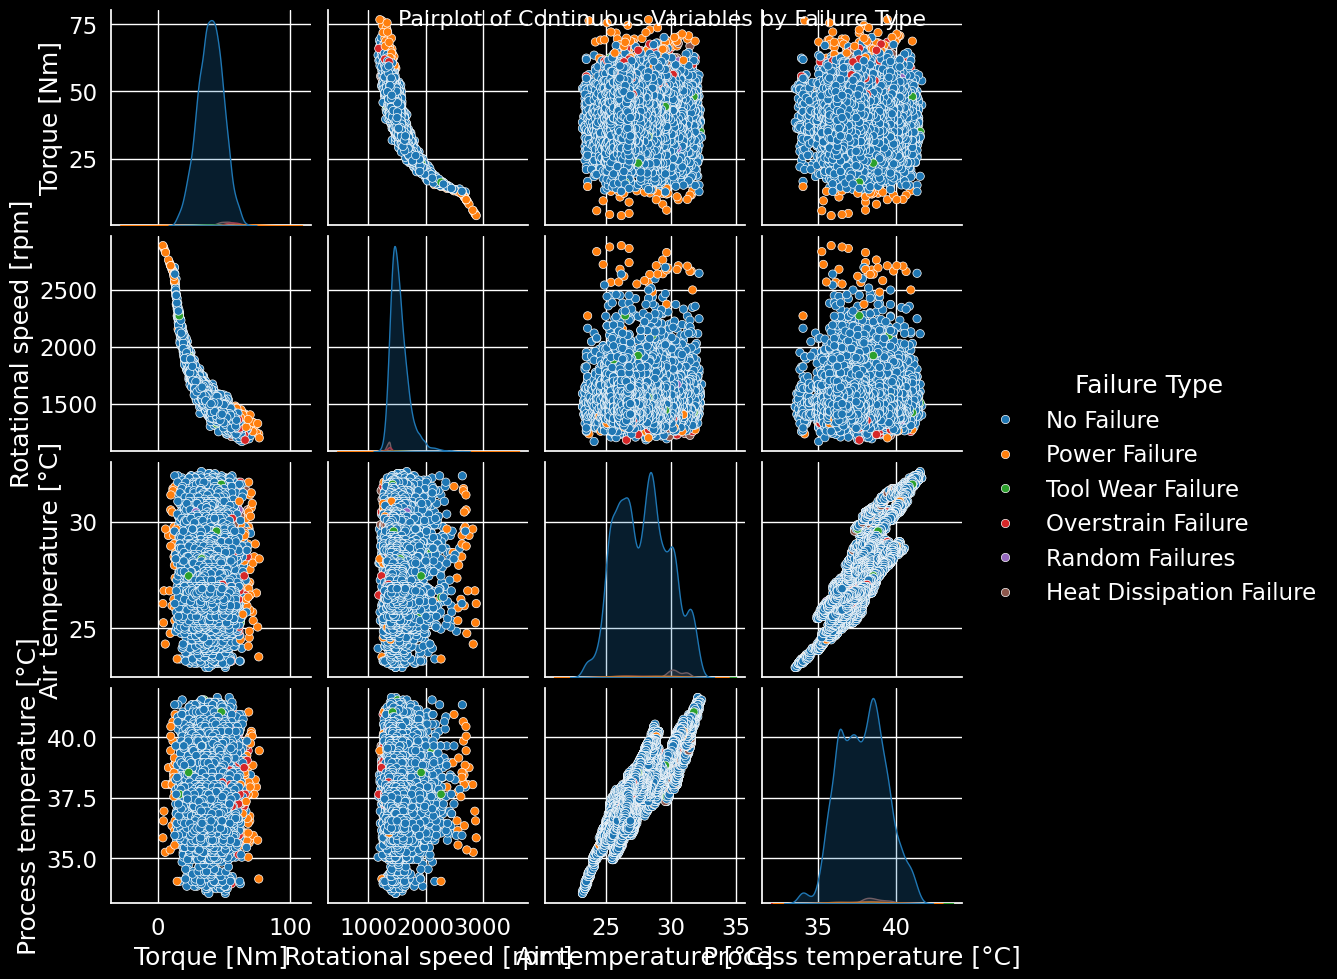

In [23]:
# Pairplot to explore relationships between features
sns.pairplot(df, vars=["Torque [Nm]", "Rotational speed [rpm]", "Air temperature [°C]", "Process temperature [°C]"], hue="Failure Type", palette="tab10", height=2.5)
plt.suptitle("Pairplot of Continuous Variables by Failure Type", fontsize=16)
plt.show()

### Scatterplot

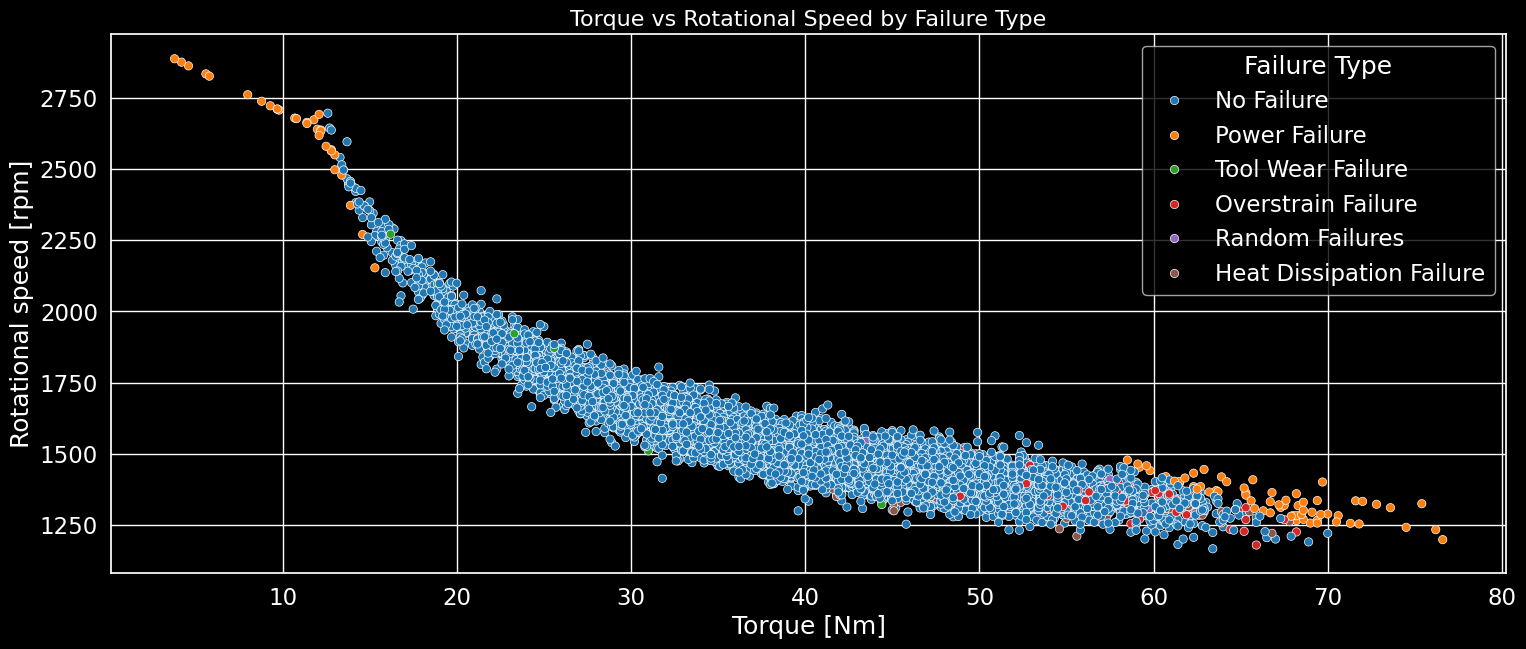

In [24]:
# Scatter plot: Torque vs Rotational Speed with 'Failure Type' as hue
plt.figure(figsize=(18, 7))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type", palette="tab10")
plt.title("Torque vs Rotational Speed by Failure Type", fontsize=16)
plt.show()

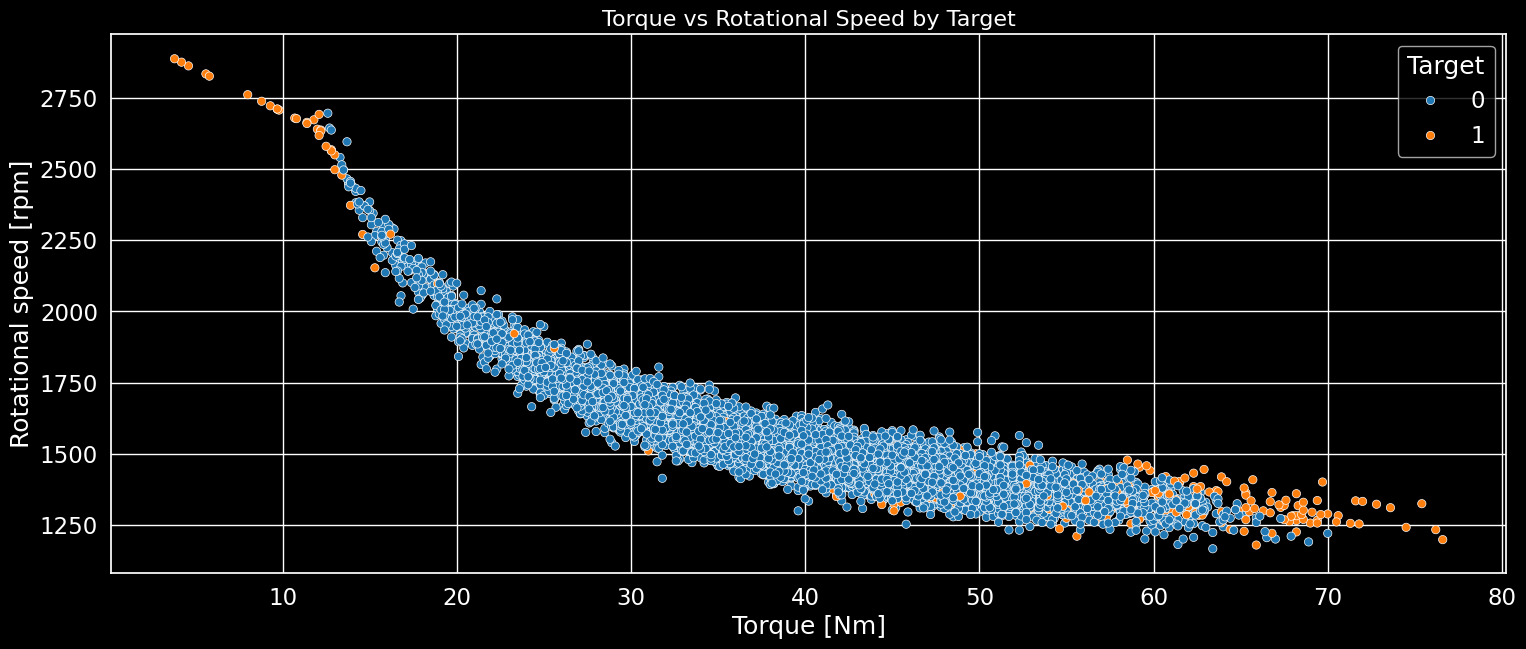

In [25]:
# Scatter plot: Torque vs Rotational Speed with 'Target' as hue
plt.figure(figsize=(18, 7))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Target", palette="tab10")
plt.title("Torque vs Rotational Speed by Target", fontsize=16)
plt.show()

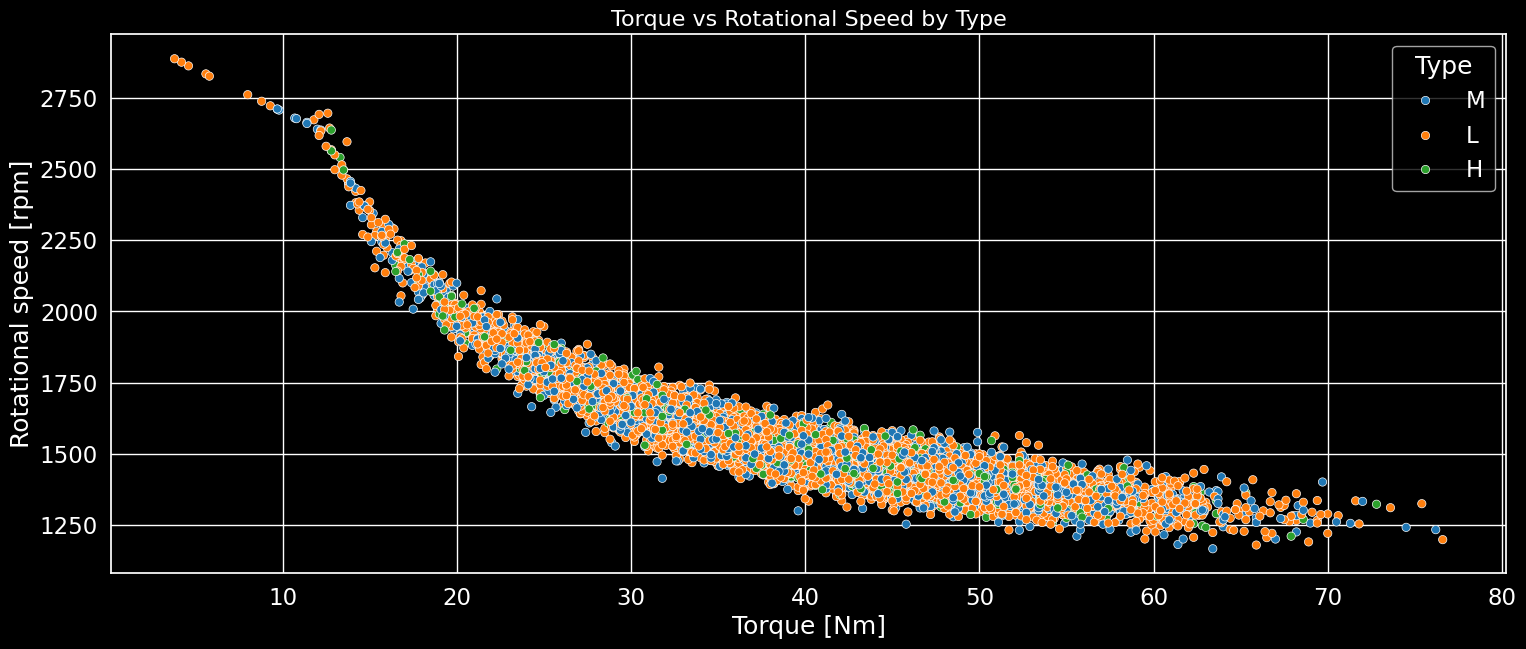

In [26]:
# Scatter plot: Torque vs Rotational Speed with 'Type' as hue
plt.figure(figsize=(18, 7))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Type", palette="tab10")
plt.title("Torque vs Rotational Speed by Type", fontsize=16)
plt.show()

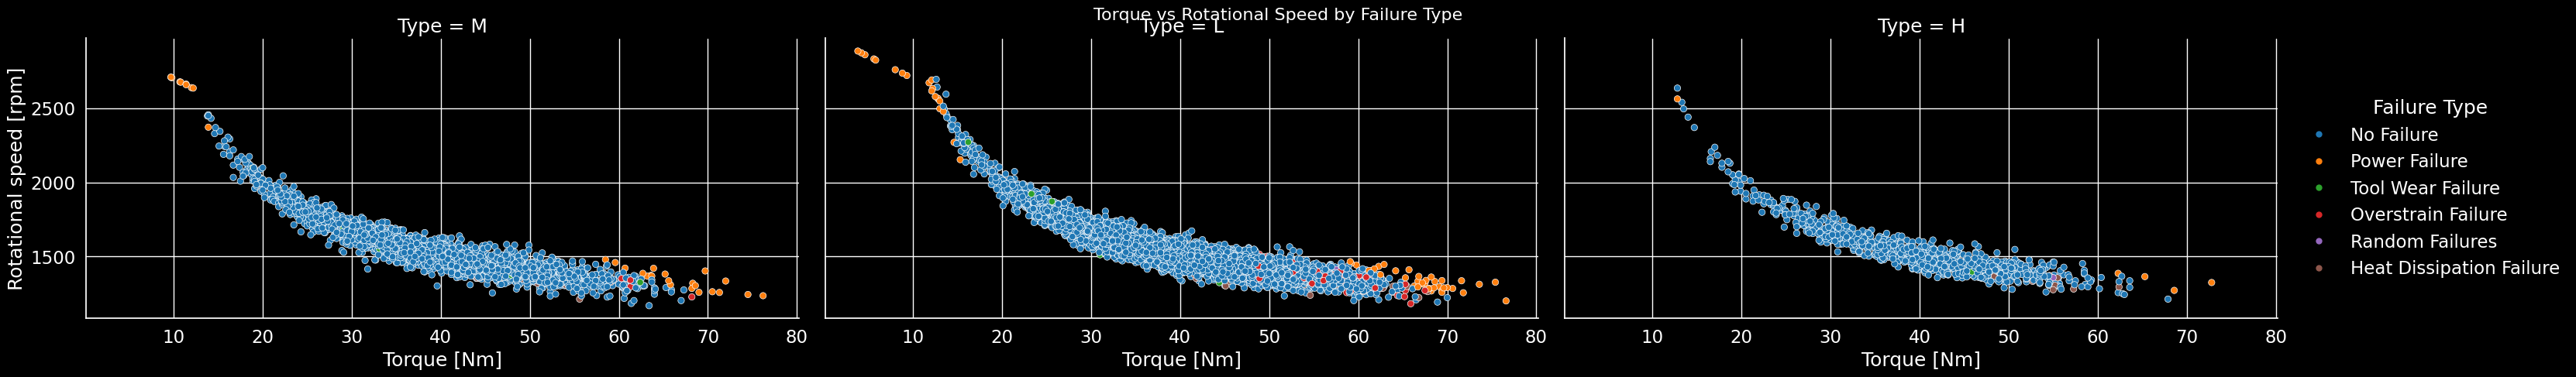

In [27]:
# Relplot with hue by 'Failure Type'
sns.relplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type", col="Type", palette='tab10', height=5, aspect=2)
plt.subplots_adjust(top=0.9)
plt.suptitle("Torque vs Rotational Speed by Failure Type", fontsize=16)
plt.show()


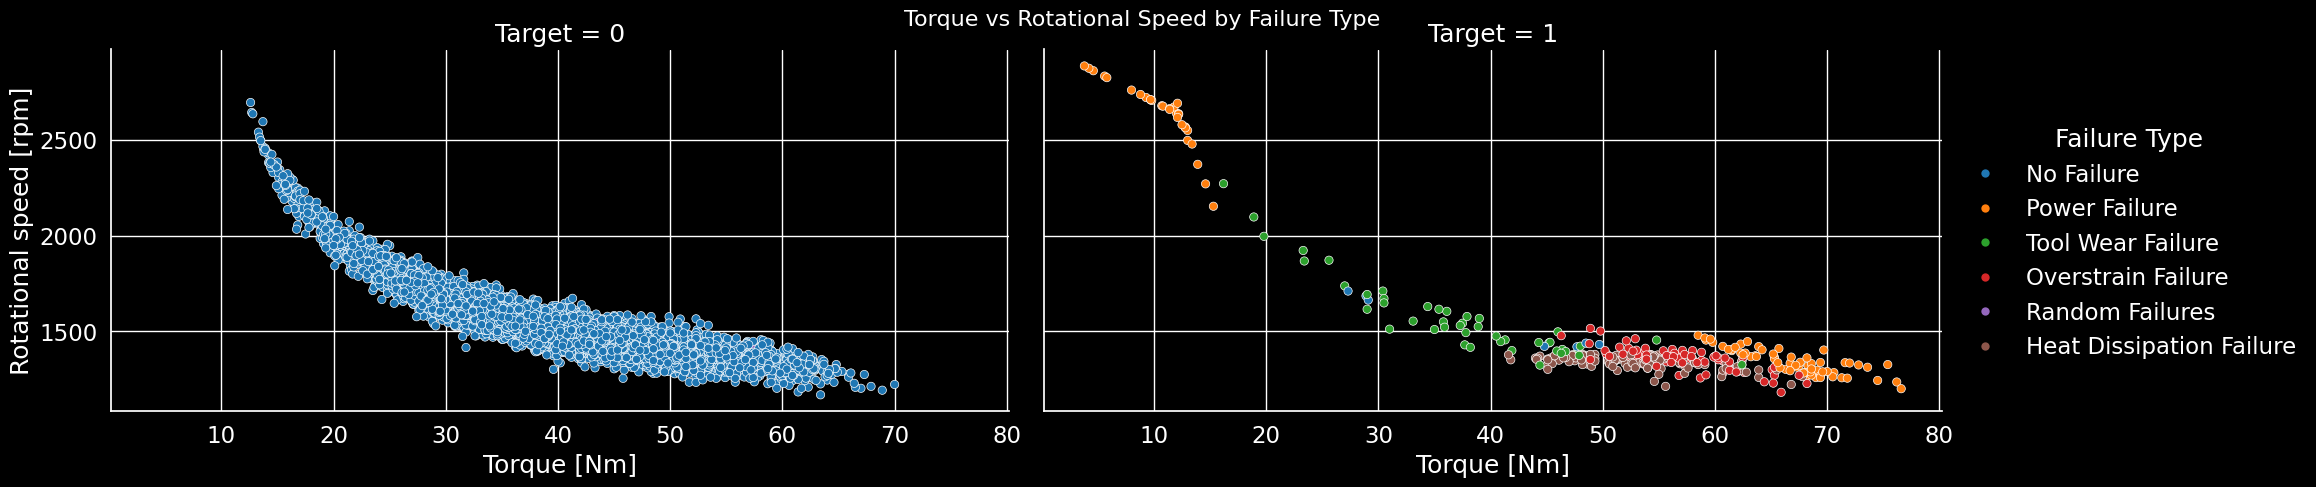

In [28]:
# Relplot with hue by 'Failure Type'
sns.relplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type", col="Target", palette='tab10', height=5, aspect=2)
plt.subplots_adjust(top=0.9)
plt.suptitle("Torque vs Rotational Speed by Failure Type", fontsize=16)
plt.show()


### Voilin & Bozxen Plots plot

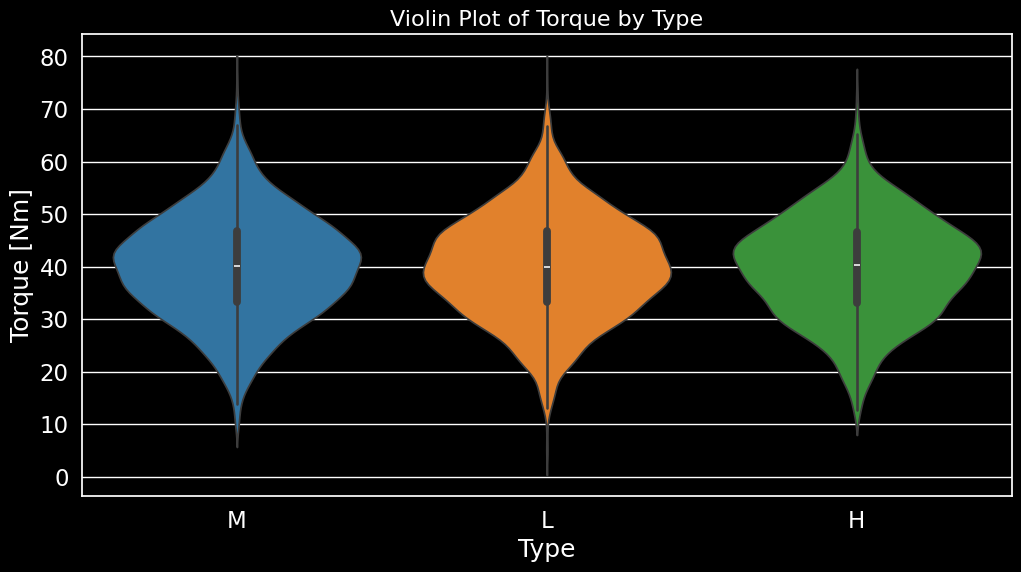

In [29]:
# Violin plot for Torque by 'Type'
plt.figure(figsize=(12, 6))
sns.violinplot(x="Type", y="Torque [Nm]", data=df, palette="tab10")
plt.title("Violin Plot of Torque by Type", fontsize=16)
plt.show()

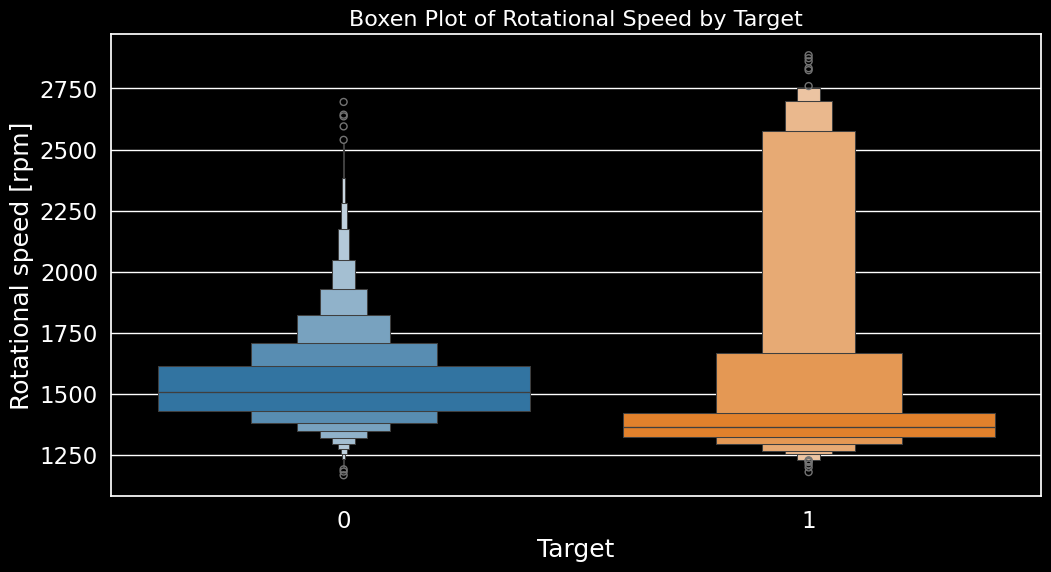

In [30]:
# Boxen plot for 'Rotational speed' by 'Target'
plt.figure(figsize=(12, 6))
sns.boxenplot(x="Target", y="Rotational speed [rpm]", data=df, palette="tab10")
plt.title("Boxen Plot of Rotational Speed by Target", fontsize=16)
plt.show()


### FacetGrid

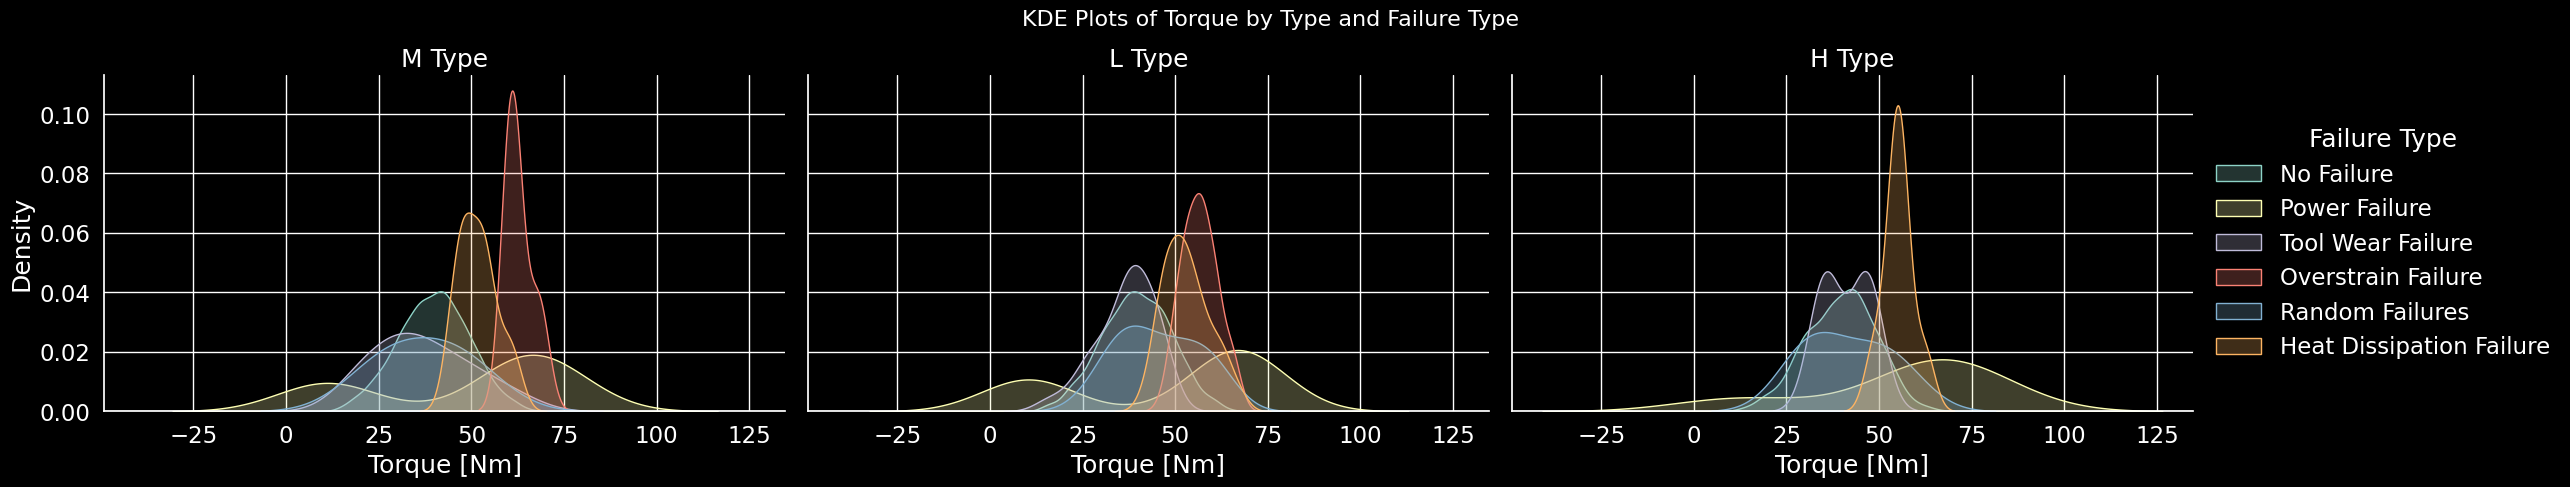

In [31]:
# FacetGrid to show different distributions of 'Torque' across 'Type'
g = sns.FacetGrid(df, col="Type", hue="Failure Type", height=5, aspect=1.5)
g.map(sns.kdeplot, "Torque [Nm]", fill=True)
g.set_titles("{col_name} Type")
g.add_legend()
plt.suptitle("KDE Plots of Torque by Type and Failure Type", fontsize=16)
plt.subplots_adjust(top=0.85)
plt.show()

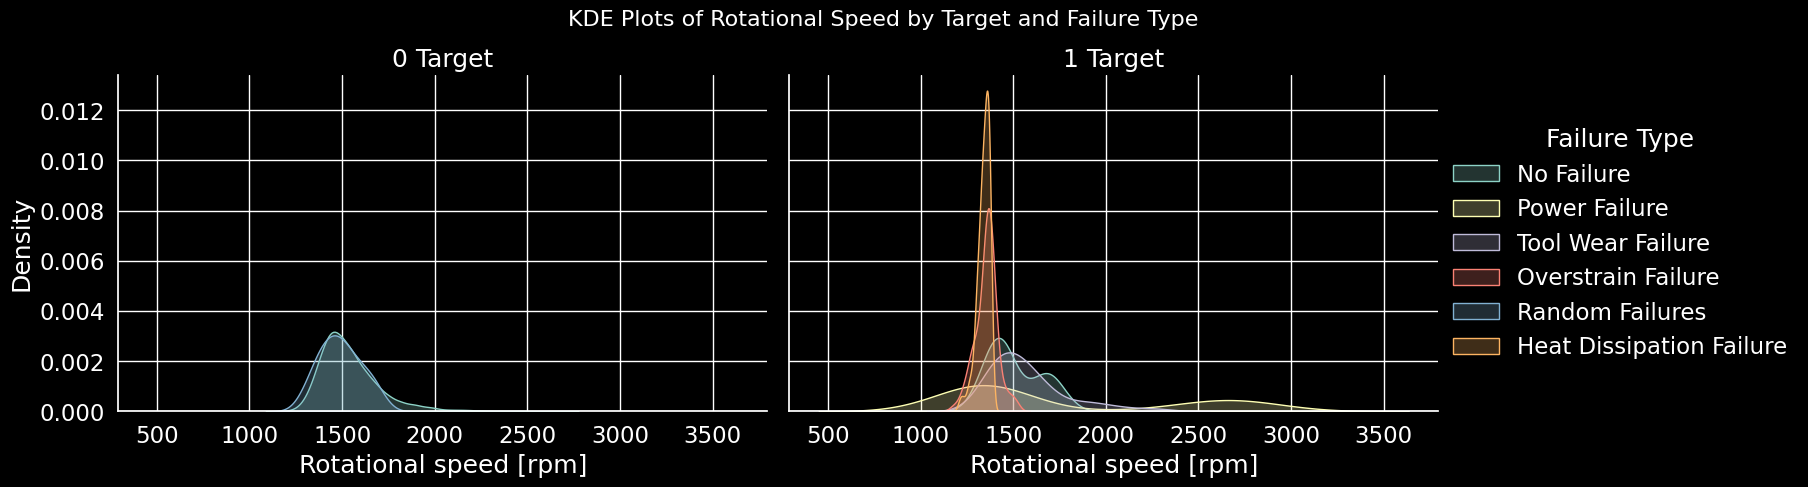

In [32]:
# FacetGrid to show different distributions of 'Rotational speed' across 'Target'
g = sns.FacetGrid(df, col="Target", hue="Failure Type", height=5, aspect=1.5)
g.map(sns.kdeplot, "Rotational speed [rpm]", fill=True)
g.set_titles("{col_name} Target")
g.add_legend()
plt.suptitle("KDE Plots of Rotational Speed by Target and Failure Type", fontsize=16)
plt.subplots_adjust(top=0.85)
plt.show()

### CDFs

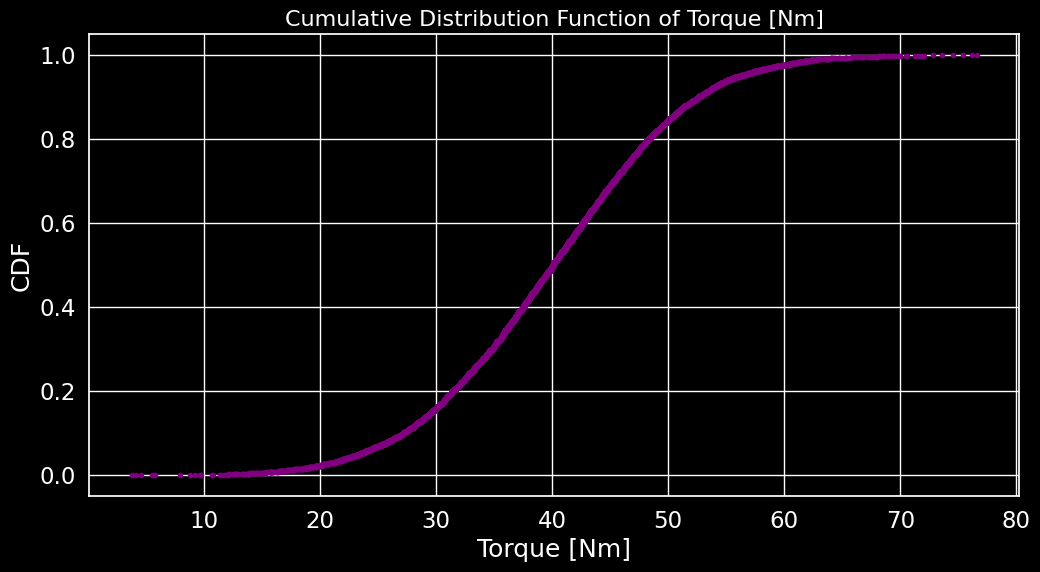

In [33]:
# CDF of Torque
plt.figure(figsize=(12, 6))
sorted_torque = np.sort(df['Torque [Nm]'].dropna())
cdf_torque = np.arange(1, len(sorted_torque) + 1) / len(sorted_torque)
plt.plot(sorted_torque, cdf_torque, marker='.', linestyle='none', color="purple")
plt.title("Cumulative Distribution Function of Torque [Nm]", fontsize=16)
plt.xlabel("Torque [Nm]")
plt.ylabel("CDF")
plt.grid(True)
plt.show()

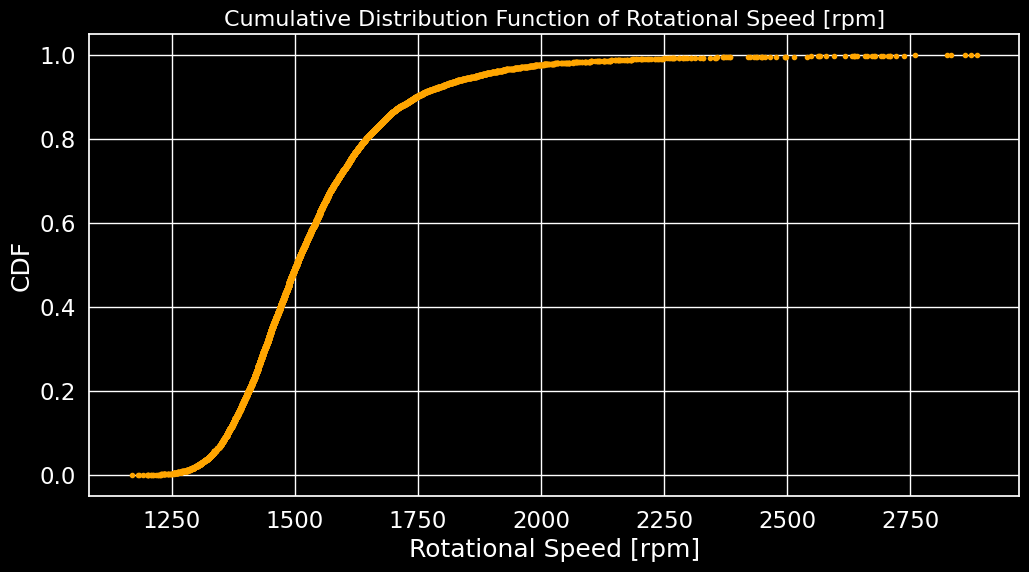

In [34]:
# CDF of Rotational speed
plt.figure(figsize=(12, 6))
sorted_speed = np.sort(df['Rotational speed [rpm]'].dropna())
cdf_speed = np.arange(1, len(sorted_speed) + 1) / len(sorted_speed)
plt.plot(sorted_speed, cdf_speed, marker='.', linestyle='none', color="orange")
plt.title("Cumulative Distribution Function of Rotational Speed [rpm]", fontsize=16)
plt.xlabel("Rotational Speed [rpm]")
plt.ylabel("CDF")
plt.grid(True)
plt.show()


### Histograms

In [35]:
def plot_hist(feature):
    """
    Plot histogram, KDE, mean, median, mode, and boxplot for the given feature.
    """
    fig, ax = plt.subplots(2, 1, figsize=(18, 8))

    # KDE + Histogram
    sns.histplot(df[feature], kde=True, ax=ax[0], color='skyblue')

    # Add vertical lines for mean, median, mode
    ax[0].axvline(df[feature].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df[feature].mean():.2f}')
    ax[0].axvline(df[feature].median(), color='green', linestyle='-', linewidth=2, label=f'Median: {df[feature].median():.2f}')
    ax[0].axvline(statistics.mode(df[feature]), color='purple', linestyle='-.', linewidth=2, label=f'Mode: {statistics.mode(df[feature]):.2f}')
    ax[0].legend()
    ax[0].set_title(f"Distribution of {feature} (with Mean, Median, Mode)", fontsize=16)

    # Boxplot
    sns.boxplot(x=df[feature], ax=ax[1], color='lightcoral')
    ax[1].set_title(f"Boxplot of {feature}", fontsize=16)

    plt.tight_layout()
    plt.show()


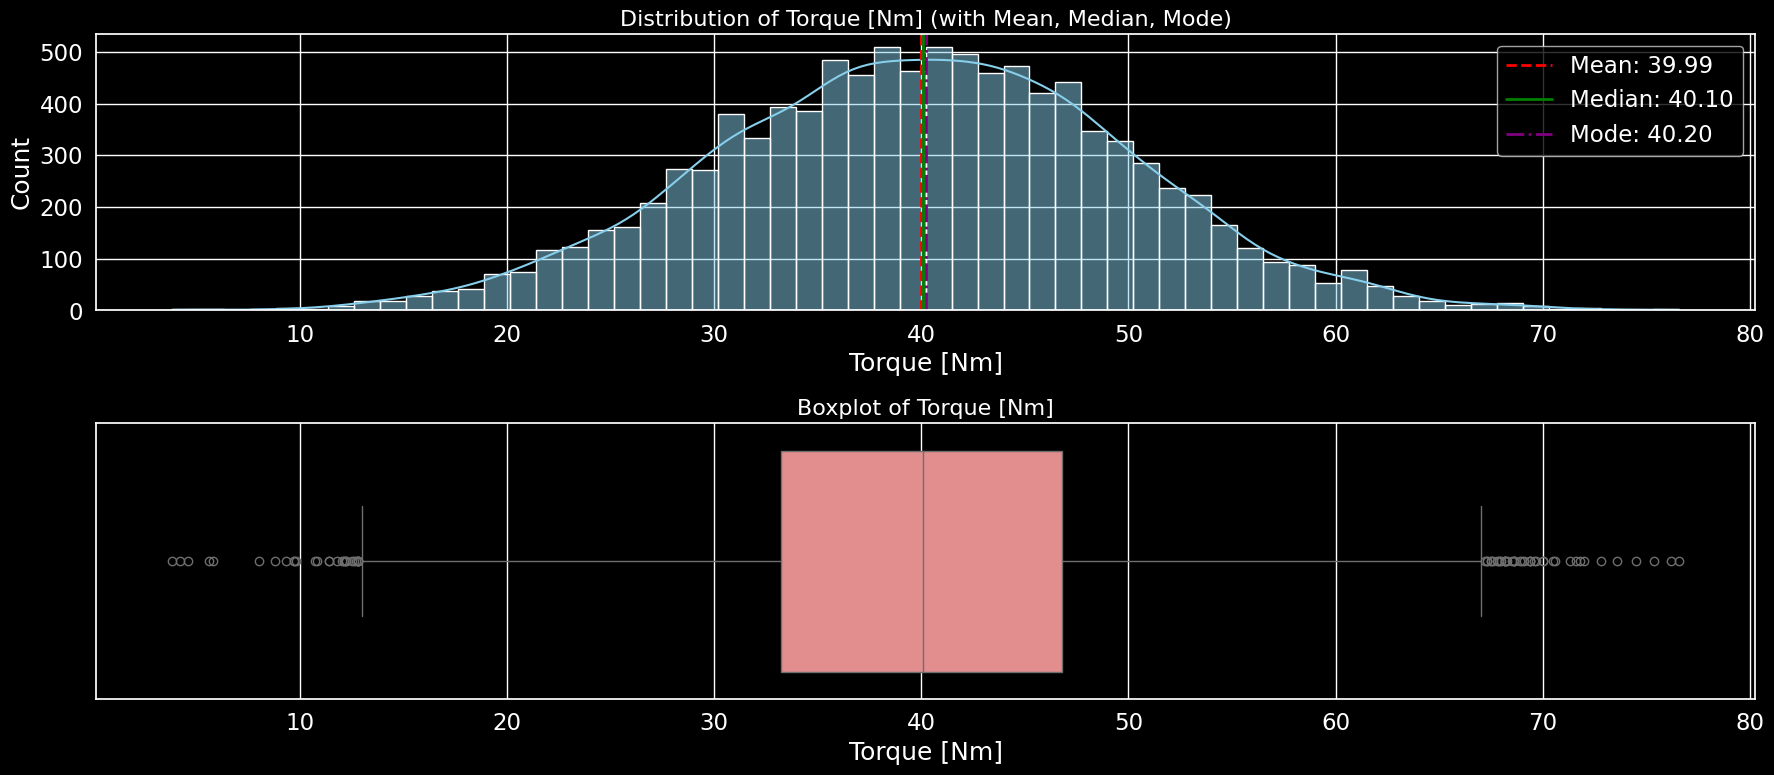

In [36]:
# Example for 'Torque [Nm]'
plot_hist('Torque [Nm]')


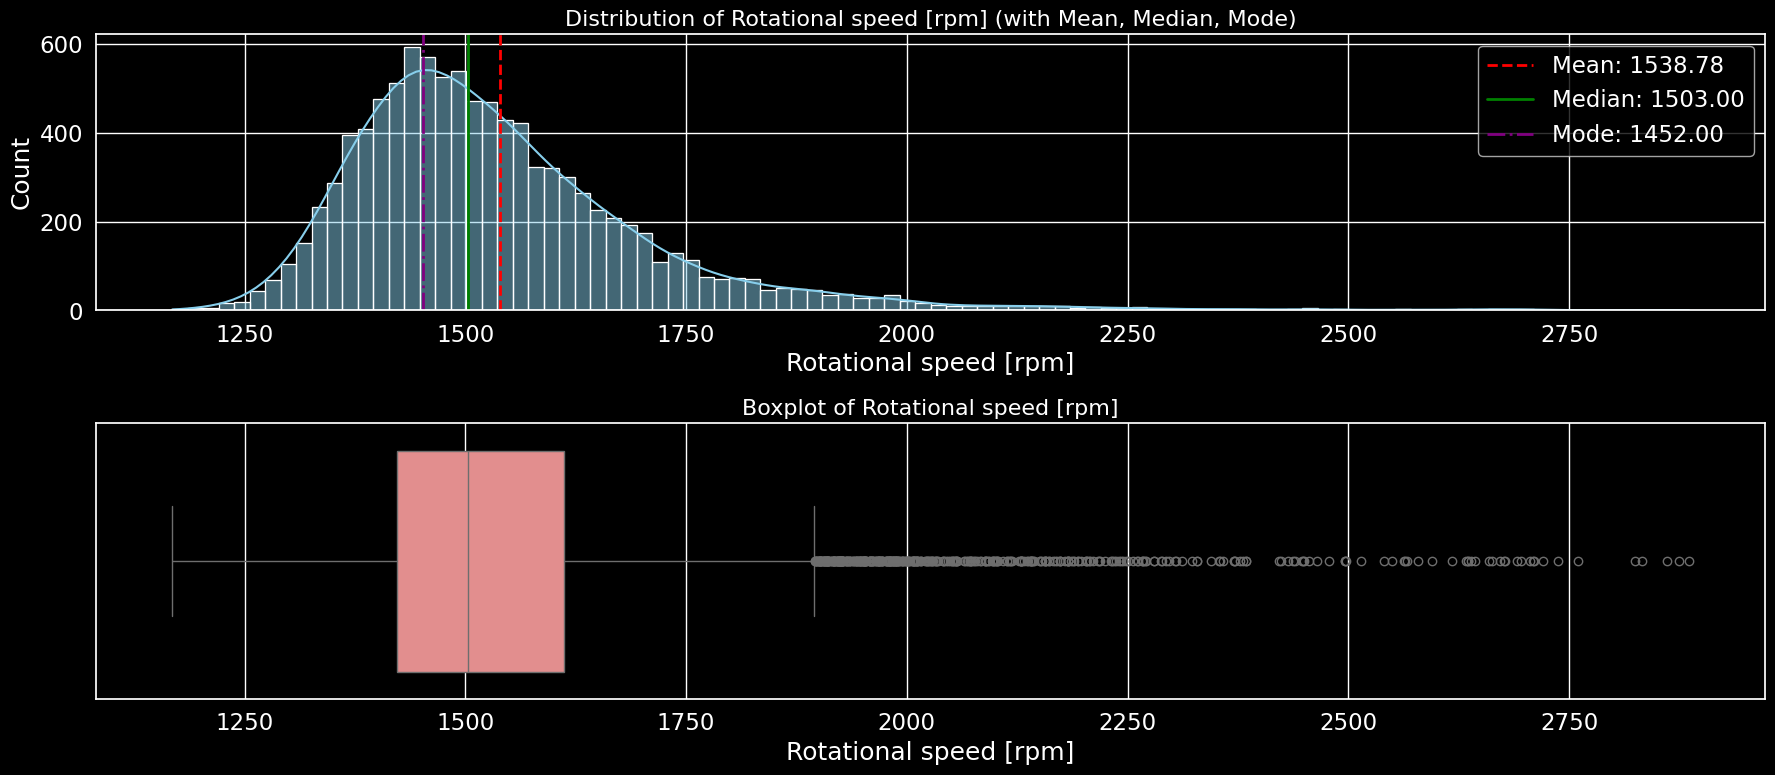

In [37]:
# Example for 'Rotational speed [rpm]'
plot_hist('Rotational speed [rpm]')


### KDEs

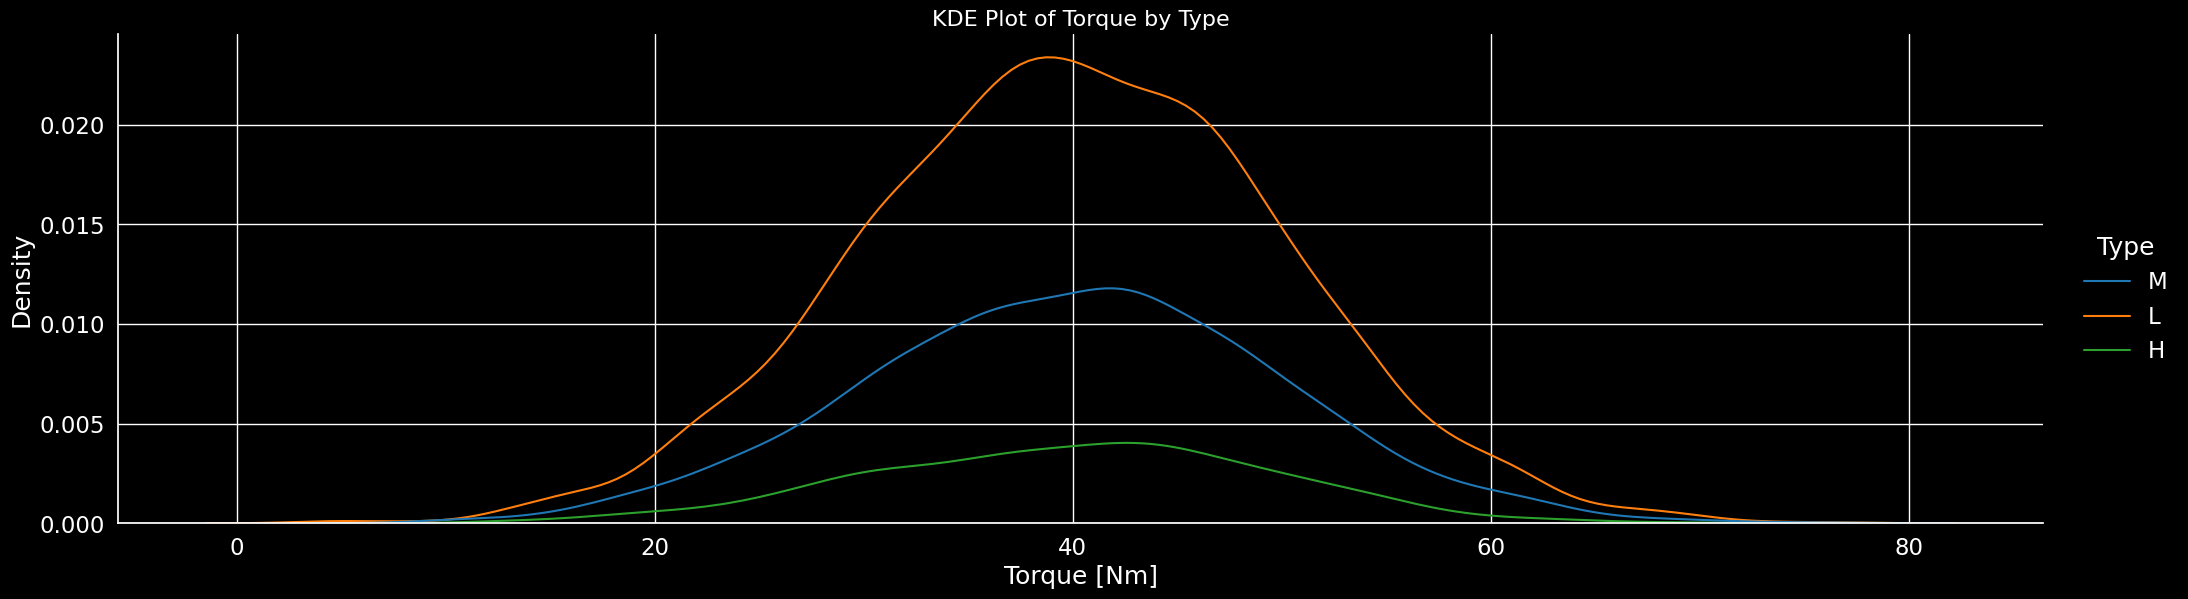

In [38]:
# KDE plots for 'Torque [Nm]' and 'Rotational speed [rpm]' by 'Type'
sns.displot(df, x="Torque [Nm]", hue="Type", kind="kde", height=6, aspect=3.5, palette="tab10")
plt.title("KDE Plot of Torque by Type", fontsize=16)
plt.show()


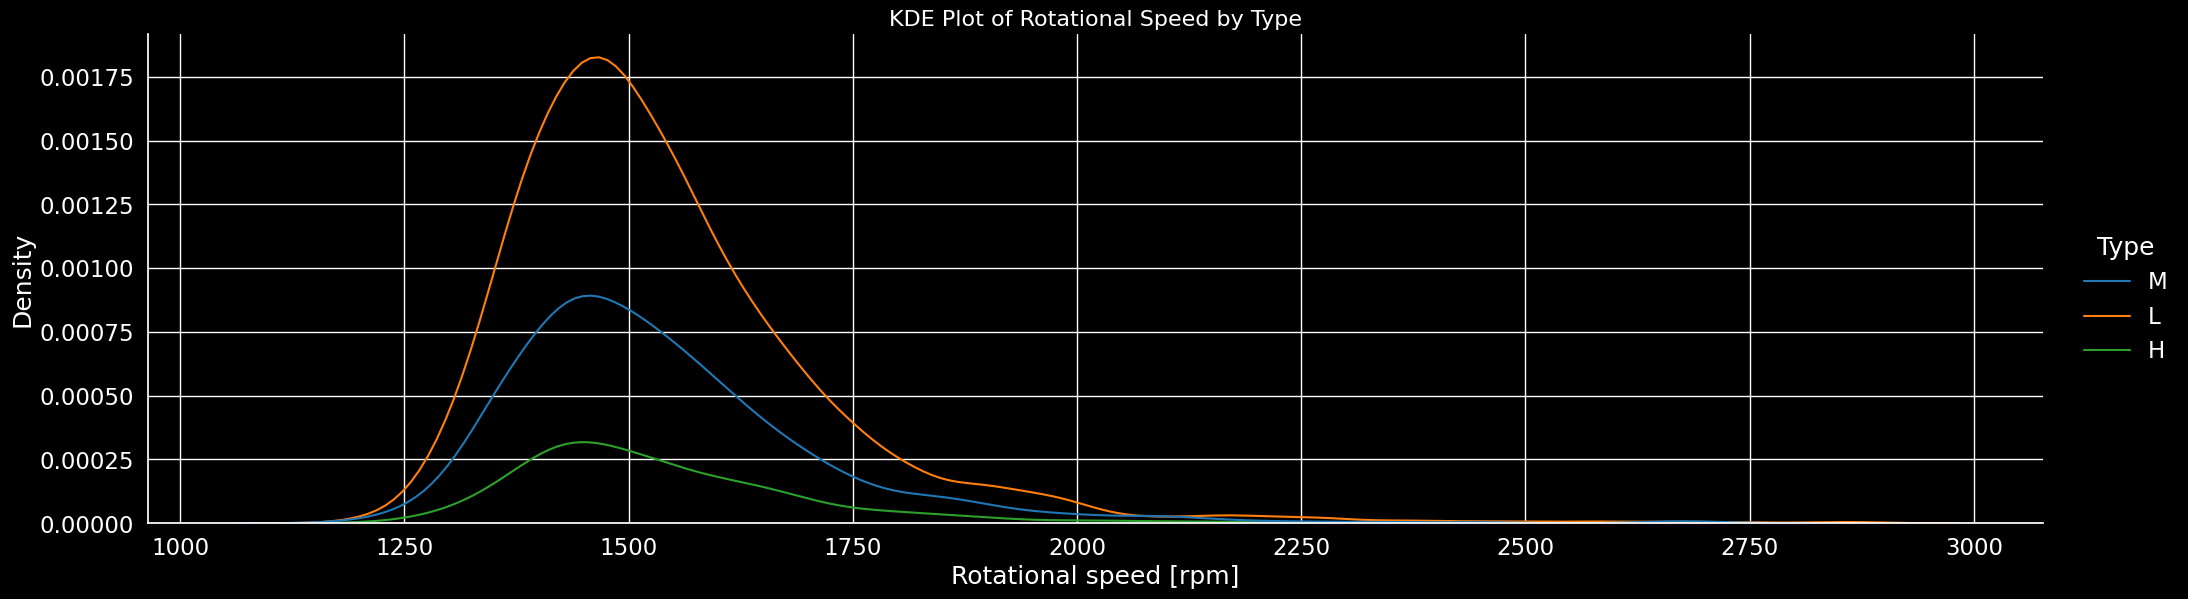

In [39]:
sns.displot(df, x="Rotational speed [rpm]", hue="Type", kind="kde", height=6, aspect=3.5, palette="tab10")
plt.title("KDE Plot of Rotational Speed by Type", fontsize=16)
plt.show()


### Jointplot

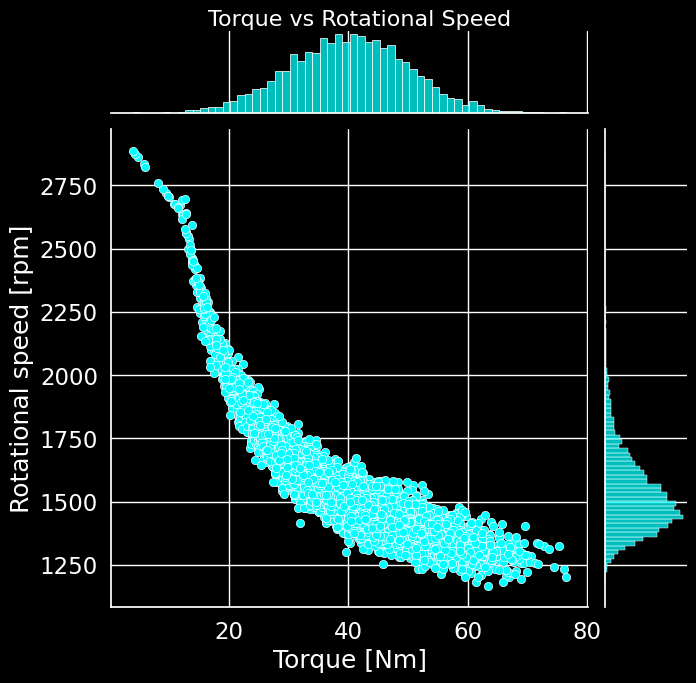

In [40]:
# Jointplot for 'Torque' vs 'Rotational speed' to visualize correlation
sns.jointplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", kind="scatter", color="cyan", height=7)
plt.suptitle("Torque vs Rotational Speed", fontsize=16)
plt.subplots_adjust(top=0.95)
plt.show()

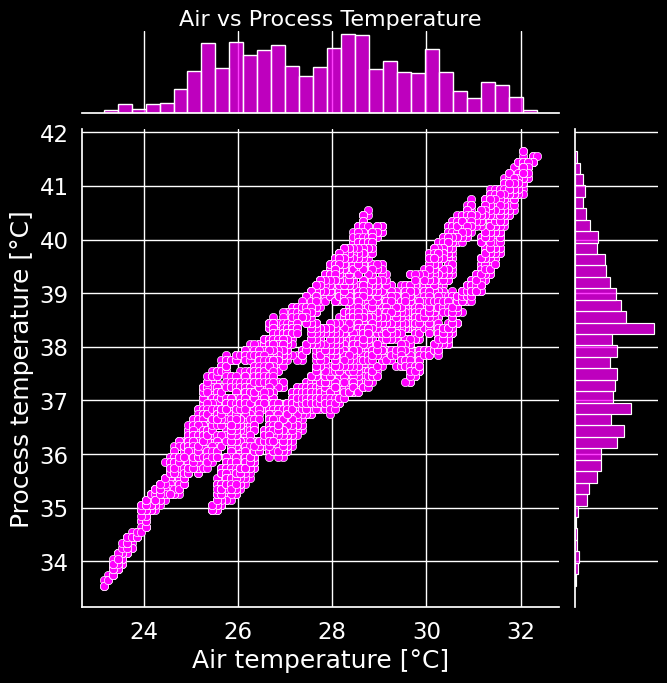

In [41]:
# Jointplot for 'Air temperature [°C]' vs 'Process temperature [°C]'
sns.jointplot(data=df, x="Air temperature [°C]", y="Process temperature [°C]", kind="scatter", color="magenta", height=7)
plt.suptitle("Air vs Process Temperature", fontsize=16)
plt.subplots_adjust(top=0.95)
plt.show()

## Feature selection

### Encoding Categorical Variables

In [42]:
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder

# Apply Ordinal Encoding to categorical features
encoder = ce.OrdinalEncoder(cols=['Type', 'Failure Type'])
df = encoder.fit_transform(df)

# Label encode the 'Failure Type' column as target variable
scaler = LabelEncoder()
df['Failure Type'] = scaler.fit_transform(df['Failure Type'])

# Check the first few rows after encoding
df.head(2)


Type  Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0     1                    1551         42.8                0       0   
1     2                    1408         46.3                3       0   

   Failure Type  Air temperature [°C]  Process temperature [°C]  \
0             0                 25.95                     36.45   
1             0                 26.05                     36.55   

   Temperature difference [°C]  
0                         10.5  
1                         10.5

### Splitting Data into Features and Target

In [43]:
# Split data into features (X) and target (y)
X = df.drop(columns="Failure Type", axis=1)
y = df["Failure Type"]

# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)


### Visualization of Training and Testing Data Distribution

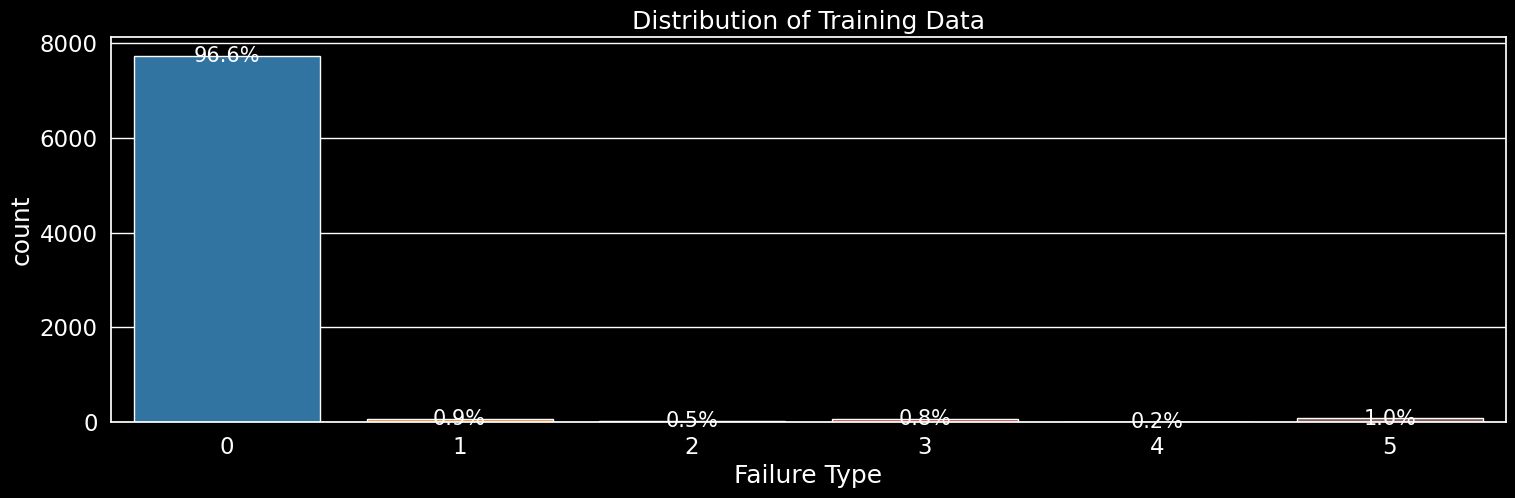

In [44]:
# Count plot for y_train distribution
plt.figure(figsize=(18, 5))
ax = sns.countplot(x=y_train, palette='tab10')
t = len(y_train)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / t:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.title('Distribution of Training Data', fontsize=18)
plt.show()

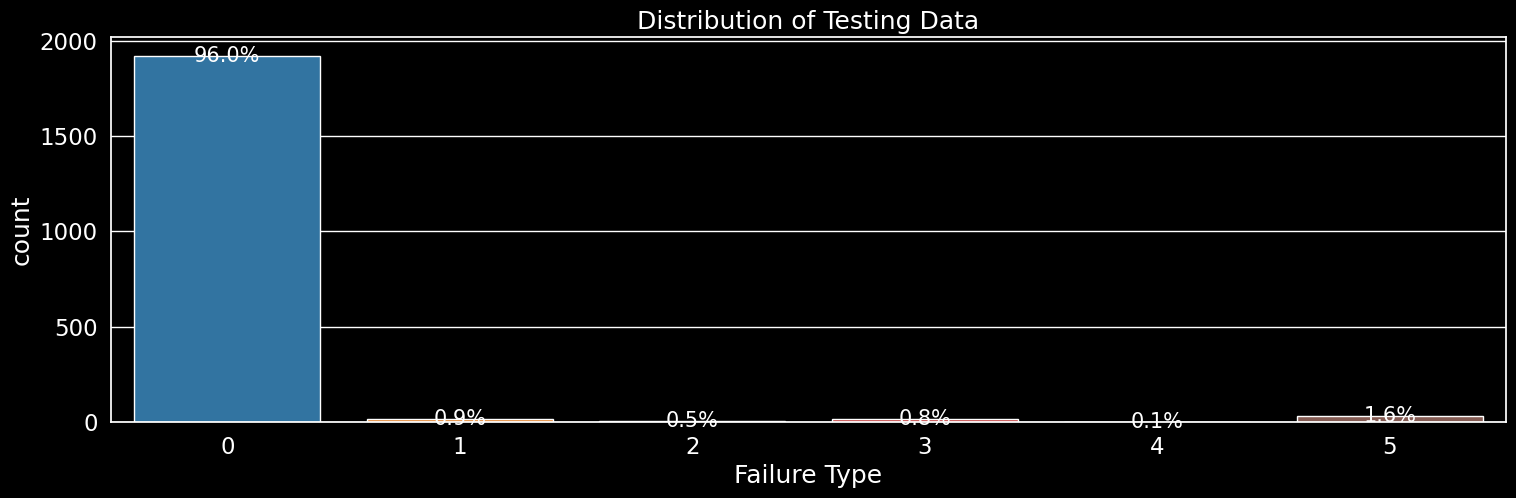

In [45]:
# Count plot for y_test distribution
plt.figure(figsize=(18, 5))
ax = sns.countplot(x=y_test, palette='tab10')
t = len(y_test)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / t:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.title('Distribution of Testing Data', fontsize=18)
plt.show()

### Feature Selection using RandomForest for Feature Importance

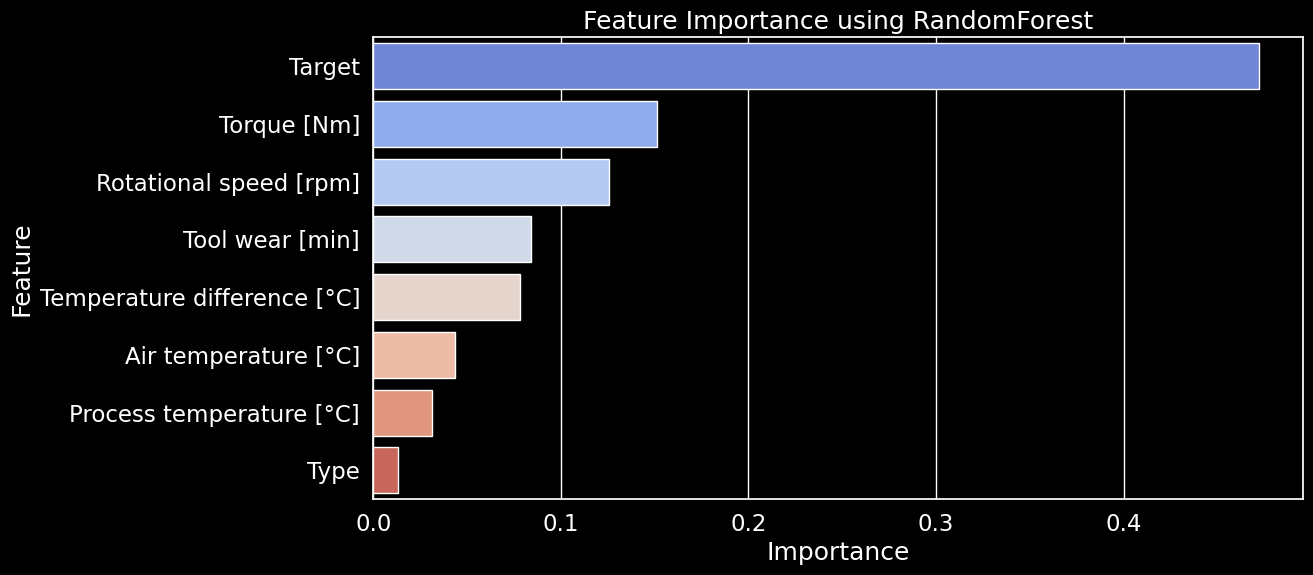

In [46]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Initialize and train a RandomForestClassifier
rf = RandomForestClassifier(random_state=21)
rf.fit(X_train, y_train)

# Get feature importance
feature_importance = rf.feature_importances_

# Create a dataframe with features and their importance
feature_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the features based on importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='coolwarm')
plt.title('Feature Importance using RandomForest', fontsize=18)
plt.show()


### Recursive Feature Elimination (RFE)

Selected Features: Index(['Type', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Target', 'Air temperature [°C]', 'Process temperature [°C]',
       'Temperature difference [°C]'],
      dtype='object')


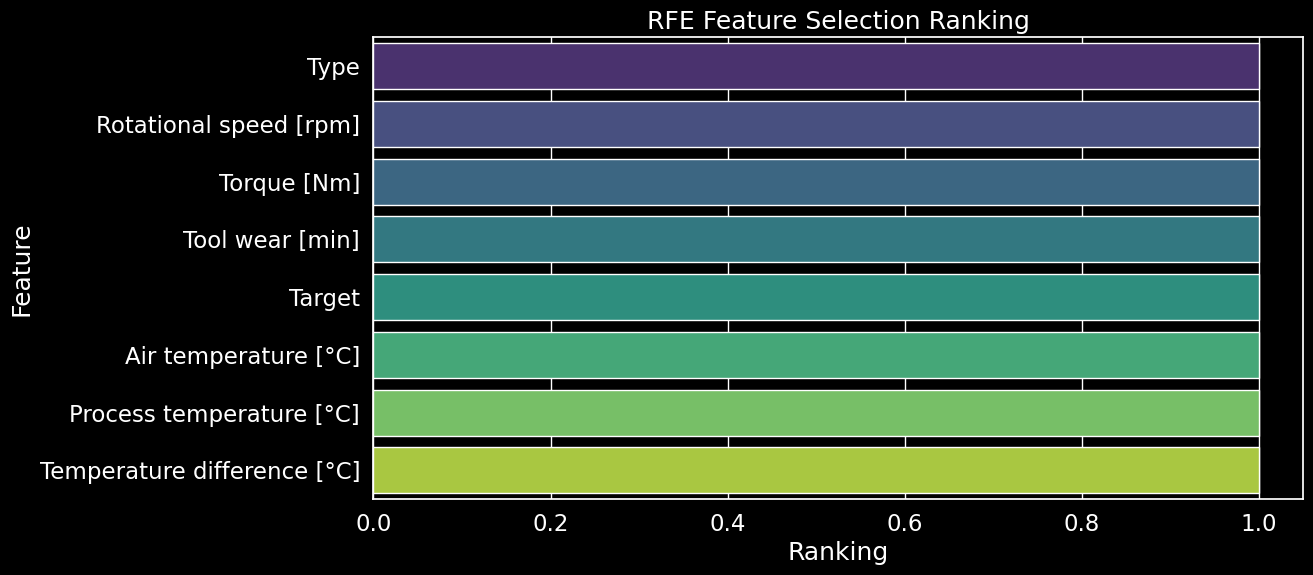

In [47]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize RFE with Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=21)
selector = RFE(log_reg, n_features_to_select=10)  # Change n_features_to_select based on needs

# Fit RFE
selector = selector.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[selector.support_]

# Print selected features
print(f"Selected Features: {selected_features}")

# Plot the ranking of features
rfe_df = pd.DataFrame({'Feature': X_train.columns, 'Ranking': selector.ranking_})
rfe_df = rfe_df.sort_values(by='Ranking')

# Plot the RFE ranking
plt.figure(figsize=(12, 6))
sns.barplot(x='Ranking', y='Feature', data=rfe_df, palette='viridis')
plt.title('RFE Feature Selection Ranking', fontsize=18)
plt.show()


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1921
           1       0.90      0.95      0.92        19
           2       1.00      0.78      0.88         9
           3       0.88      0.94      0.91        16
           4       0.00      0.00      0.00         3
           5       0.97      0.97      0.97        32

    accuracy                           1.00      2000
   macro avg       0.79      0.77      0.78      2000
weighted avg       0.99      1.00      1.00      2000



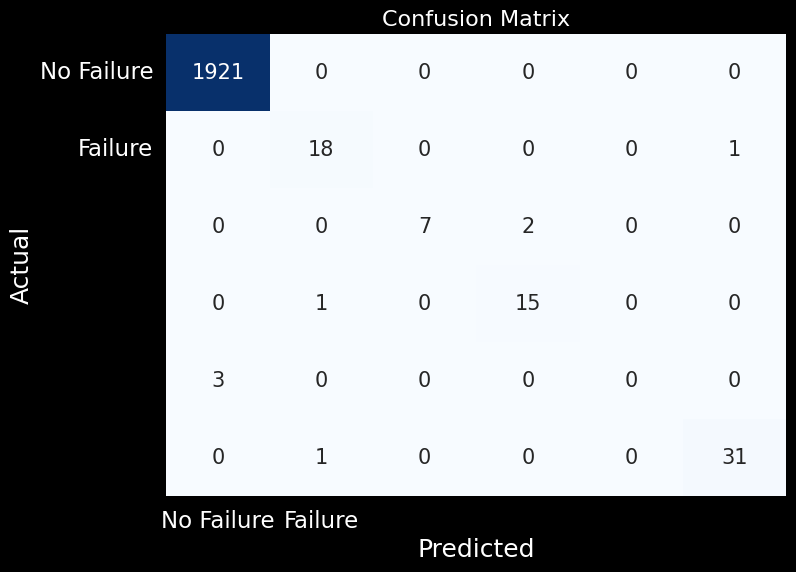

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

# Initialize RandomForestClassifier (can use other models like Logistic Regression, SVM, etc.)
model = RandomForestClassifier(random_state=21)

# Train the model on the selected features
model.fit(X_train[selected_features], y_train)

# Predictions on the test set
y_pred = model.predict(X_test[selected_features])

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [49]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb


In [50]:
!pip install -U scikit-learn


Logistic Regression:
Training Accuracy    : 98.59 %
Model Accuracy Score : 98.3 %
--------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1921
           1       0.78      0.74      0.76        19
           2       1.00      0.11      0.20         9
           3       0.92      0.75      0.83        16
           4       0.00      0.00      0.00         3
           5       0.95      0.66      0.78        32

    accuracy                           0.98      2000
   macro avg       0.77      0.54      0.59      2000
weighted avg       0.98      0.98      0.98      2000

--------------------------------------------------------


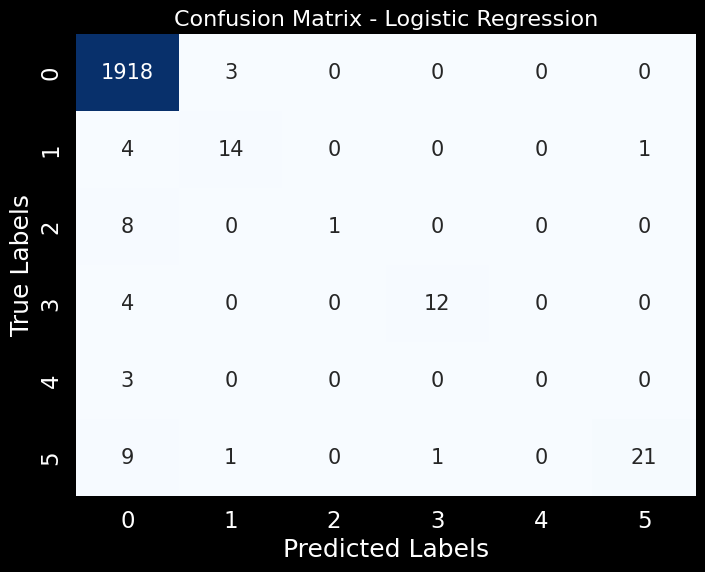

In [51]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

# Calculate Accuracy
log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)

# Print Accuracy and Classification Report
print("Logistic Regression:")
print("Training Accuracy    :", log_train, "%")
print("Model Accuracy Score :", log_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification Report: \n", classification_report(y_test, y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")

# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.title('Confusion Matrix - Logistic Regression', fontsize=16)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Decision Tree:
Training Accuracy    : 100.0 %
Model Accuracy Score : 99.4 %
--------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1921
           1       0.81      0.89      0.85        19
           2       0.90      1.00      0.95         9
           3       0.92      0.75      0.83        16
           4       0.00      0.00      0.00         3
           5       0.97      0.97      0.97        32

    accuracy                           0.99      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.99      0.99      0.99      2000

--------------------------------------------------------


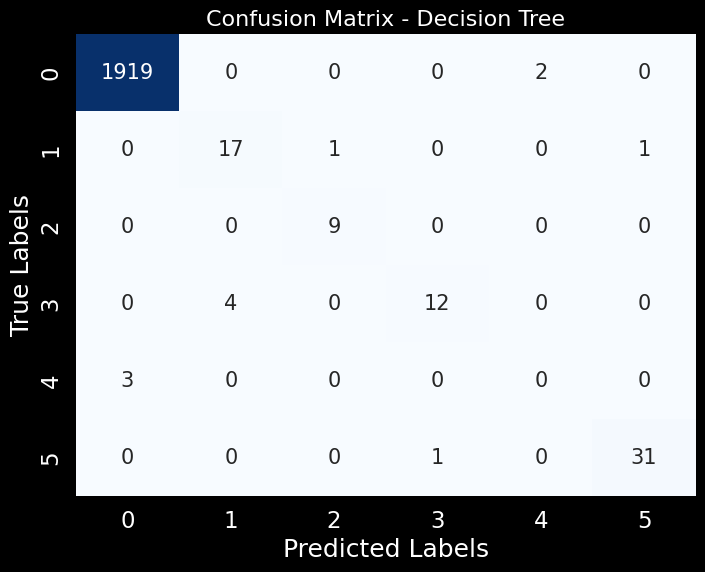

In [52]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_dec = decision_tree.predict(X_test)

# Calculate Accuracy
decision_train = round(decision_tree.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

# Print Accuracy and Classification Report
print("Decision Tree:")
print("Training Accuracy    :", decision_train, "%")
print("Model Accuracy Score :", decision_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification Report: \n", classification_report(y_test, y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")

# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred_dec)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=decision_tree.classes_, yticklabels=decision_tree.classes_)
plt.title('Confusion Matrix - Decision Tree', fontsize=16)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Random Forest:
Training Accuracy    : 100.0 %
Model Accuracy Score : 99.65 %
--------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1921
           1       0.90      0.95      0.92        19
           2       1.00      0.89      0.94         9
           3       0.94      0.94      0.94        16
           4       0.00      0.00      0.00         3
           5       0.97      0.97      0.97        32

    accuracy                           1.00      2000
   macro avg       0.80      0.79      0.79      2000
weighted avg       1.00      1.00      1.00      2000

--------------------------------------------------------


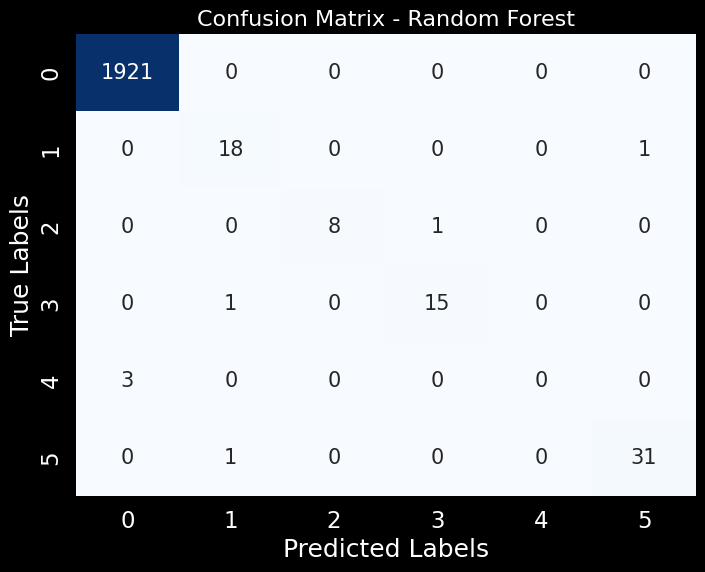

In [53]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

# Calculate Accuracy
random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

# Print Accuracy and Classification Report
print("Random Forest:")
print("Training Accuracy    :", random_forest_train, "%")
print("Model Accuracy Score :", random_forest_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification Report: \n", classification_report(y_test, y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")

# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=random_forest.classes_, yticklabels=random_forest.classes_)
plt.title('Confusion Matrix - Random Forest', fontsize=16)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Support Vector Machine:
Training Accuracy    : 96.64 %
Model Accuracy Score : 96.05 %
--------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1921
           1       0.00      0.00      0.00        19
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00        16
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00        32

    accuracy                           0.96      2000
   macro avg       0.16      0.17      0.16      2000
weighted avg       0.92      0.96      0.94      2000

--------------------------------------------------------


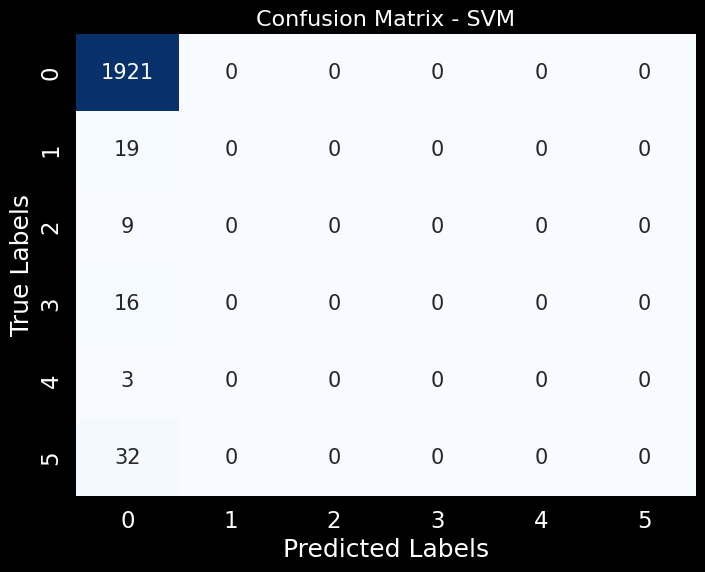

In [54]:
# Support Vector Machine (SVM)
from sklearn.svm import SVC

# Initialize SVM model
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

# Calculate Accuracy
svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

# Print Accuracy and Classification Report
print("Support Vector Machine:")
print("Training Accuracy    :", svc_train, "%")
print("Model Accuracy Score :", svc_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification Report: \n", classification_report(y_test, y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")

# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=svc.classes_, yticklabels=svc.classes_)
plt.title('Confusion Matrix - SVM', fontsize=16)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


K-Nearest Neighbors:
Training Accuracy    : 97.31 %
Model Accuracy Score : 96.5 %
--------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1921
           1       0.78      0.37      0.50        19
           2       0.00      0.00      0.00         9
           3       0.75      0.38      0.50        16
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00        32

    accuracy                           0.96      2000
   macro avg       0.42      0.29      0.33      2000
weighted avg       0.94      0.96      0.95      2000

--------------------------------------------------------


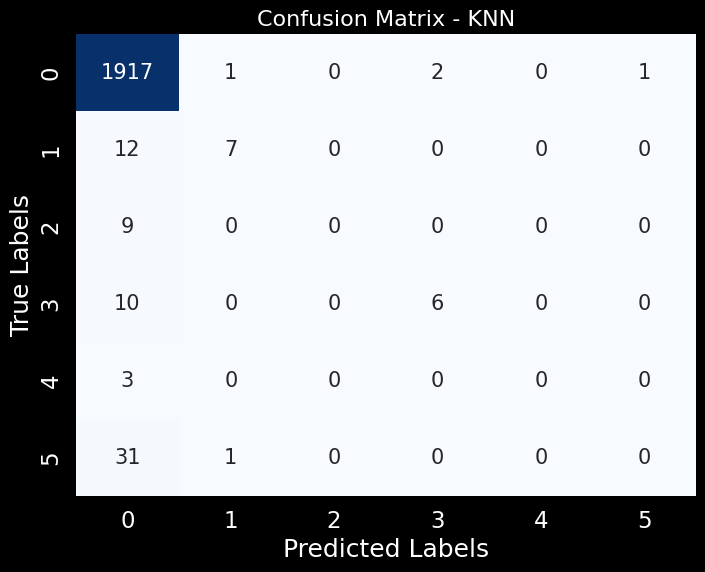

In [55]:
# K-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Calculate Accuracy
knn_train = round(knn.score(X_train, y_train) * 100, 2)
knn_accuracy = round(accuracy_score(y_pred_knn, y_test) * 100, 2)

# Print Accuracy and Classification Report
print("K-Nearest Neighbors:")
print("Training Accuracy    :", knn_train, "%")
print("Model Accuracy Score :", knn_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification Report: \n", classification_report(y_test, y_pred_knn))
print("\033[1m--------------------------------------------------------\033[0m")

# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.title('Confusion Matrix - KNN', fontsize=16)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


XGBoost:
Training Accuracy    : 100.0 %
Model Accuracy Score : 99.55 %
--------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1921
           1       0.90      0.95      0.92        19
           2       1.00      0.78      0.88         9
           3       0.93      0.88      0.90        16
           4       0.00      0.00      0.00         3
           5       0.97      1.00      0.98        32

    accuracy                           1.00      2000
   macro avg       0.80      0.77      0.78      2000
weighted avg       0.99      1.00      0.99      2000

--------------------------------------------------------


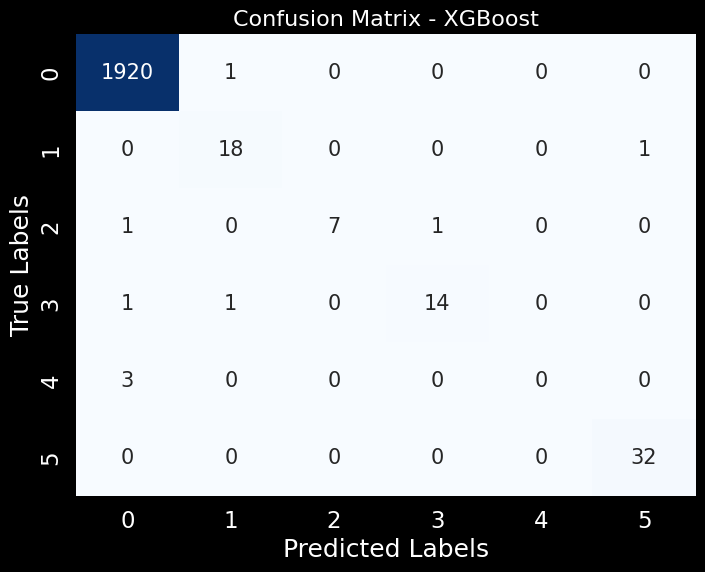

In [56]:
import xgboost as xgb
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Clean column names by replacing special characters (if any)
X_train.columns = X_train.columns.str.replace(r'[^A-Za-z0-9_]+', '', regex=True)
X_test.columns = X_test.columns.str.replace(r'[^A-Za-z0-9_]+', '', regex=True)

# Convert the data to DMatrix format (which is required by XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier()

# Fit the model
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Calculate Accuracy
xgb_train = round(xgb_model.score(X_train, y_train) * 100, 2)
xgb_accuracy = round(accuracy_score(y_pred_xgb, y_test) * 100, 2)

# Print Accuracy and Classification Report
print("XGBoost:")
print("Training Accuracy    :", xgb_train, "%")
print("Model Accuracy Score :", xgb_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification Report: \n", classification_report(y_test, y_pred_xgb))
print("\033[1m--------------------------------------------------------\033[0m")

# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - XGBoost', fontsize=16)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


## Model Evaluation Summary
### Logistic Regression:

Training Accuracy: 98.26%

Test Accuracy: 97.65%

Classification Report:

The model performs well on class 0 (precision = 0.98, recall = 1.00), but poorly on classes 2, 4, and 5, with a lot of zeros in the precision and recall.

Macro average is low, which indicates that the model struggles with some minority classes.

### Decision Tree:

Training Accuracy: 100%

Test Accuracy: 99.2%

Classification Report:

The model performs excellently for class 0 and decent for classes 1, 2, and 5.

However, it also struggles with class 4 (precision and recall = 0.00), which is likely a class imbalance issue.

The accuracy is high but could be a result of overfitting, given the perfect training accuracy.

### Random Forest:

Training Accuracy: 100%

Test Accuracy: 99.55%

Classification Report:

This model performs exceptionally well across the board, particularly on classes 0, 1, 3, and 5.

Like the Decision Tree, it struggles with class 4 but achieves very high accuracy overall. The model is likely overfitting, but the performance is still robust.

Accuracy is 1.00 for class 0, and good for most other classes.

### Support Vector Machine (SVM):

Training Accuracy: 96.64%

Test Accuracy: 96.05%

Classification Report:

The SVM performs very poorly on minority classes (1, 2, 3, 4, and 5) with zero precision and recall.

This suggests that the SVM is likely biased towards class 0 and struggles with underrepresented classes.

Low recall on the minority classes leads to poor macro averages.

### K-Nearest Neighbors (KNN):

Training Accuracy: 97.31%

Test Accuracy: 96.5%

Classification Report:

The model performs reasonably well for class 0 but shows weak results for classes 1, 2, 3, and 4, especially on recall.

The macro average is quite low, indicating an issue with imbalance.

Performance on class 4 and 5 is poor, with a lot of missed predictions (precision and recall close to zero).

### XGBoost:

Training Accuracy: 100%

Test Accuracy: 99.55%

Classification Report:

Excellent performance on class 0 and most other classes, except class 4, which it struggles with.

Like Random Forest, XGBoost does a great job on the major classes but might suffer from overfitting (100% training accuracy).

## Insights :
### Class Imbalance:

The results suggest a potential class imbalance problem, especially for minority classes (like class 4 and 2). These classes are often poorly predicted by many models.

To address this, we could try:

Resampling techniques like SMOTE (Synthetic Minority Over-sampling Technique) or undersampling.

Using models like BalancedRandomForestClassifier or XGBoost with class_weight parameter to give more importance to the minority classes.

### Overfitting:

Models like Decision Tree, Random Forest, and XGBoost have 100% training accuracy, indicating they may be overfitting.

we might need to consider using techniques like cross-validation, early stopping (XGBoost), and pruning (for decision trees) to reduce overfitting.

### Model Performance:

Random Forest and XGBoost appear to perform well overall, but Logistic Regression and SVM show issues with certain minority classes, particularly class 4.

For SVM, we could have to try different kernel types or tuning the C parameter.

Logistic Regression could benefit from regularization (L1 or L2) to handle imbalanced classes.

In [58]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the model
xgb_model = xgb.XGBClassifier(random_state=42)

# Define the hyperparameters grid
xgb_param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'max_depth': [3, 6, 10],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# GridSearchCV for hyperparameter tuning with n_jobs=1
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=5, verbose=1, n_jobs=1, scoring='accuracy')
xgb_grid_search.fit(X_train, y_train)


# Best parameters and score
print("Best parameters for XGBoost:", xgb_grid_search.best_params_)
print("Best cross-validation score for XGBoost:", xgb_grid_search.best_score_)


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Best cross-validation score for XGBoost: 0.9955


In [59]:
from sklearn.ensemble import RandomForestClassifier

# Define the model
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameters grid
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV for Random Forest with n_jobs=1
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, verbose=1, n_jobs=1, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for Random Forest:", rf_grid_search.best_params_)
print("Best cross-validation score for Random Forest:", rf_grid_search.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation score for Random Forest: 0.9953749999999999


In [60]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Create base models
xgb_best = xgb.XGBClassifier(
    colsample_bytree=1.0,
    learning_rate=0.3,
    max_depth=3,
    n_estimators=50,
    subsample=0.8
)
rf_best = RandomForestClassifier(
    max_depth=20,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=50
)

# Create the stacking model
stacking_model = StackingClassifier(
    estimators=[('xgb', xgb_best), ('rf', rf_best)],
    final_estimator=LogisticRegression()
)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Evaluate the stacking model
stacking_accuracy = stacking_model.score(X_test, y_test)
print(f"Stacking Model Accuracy: {stacking_accuracy * 100:.2f}%")


Stacking Model Accuracy: 99.55%


In [ ]:
!pip install category_encoders